# Unsupervised Learning

#### Unsupervised Learning dataset source link:https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#uploading the dataset

In [4]:
dfunsupervised = pd.read_csv(r"D:\ML cw\Penguins-Unsupervised Learning\penguins.csv")

In [5]:
dfunsupervised.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE

In [6]:
dfunsupervised.shape

(344, 5)

## Data Cleaning

In [7]:
#exploring the data set on data types, and whether it has null values

In [8]:
dfunsupervised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [9]:
#dropping duplicated rows

In [10]:
dfunsupervised.drop_duplicates(inplace=True)

In [11]:
dfunsupervised.shape

(343, 5)

In [12]:
#one row was duplicated

In [13]:
#checking null values

In [14]:
pd.isnull(dfunsupervised).sum(axis=0)

culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

In [15]:
# Replace '.' with NaN in the 'sex' column
dfunsupervised['sex'] = dfunsupervised['sex'].replace('.', np.nan)

In [16]:
#dropping null values

In [17]:
dfunsupervised = dfunsupervised.dropna()

In [18]:
dfunsupervised.shape

(334, 5)

In [19]:
#dropping values that are negative because it is unrealistic when considering penguins

In [20]:
dfunsupervised = dfunsupervised[dfunsupervised["culmen_length_mm"] >=0]
dfunsupervised = dfunsupervised[dfunsupervised["culmen_depth_mm"] >=0]
dfunsupervised = dfunsupervised[dfunsupervised["flipper_length_mm"] >=0]
dfunsupervised = dfunsupervised[dfunsupervised["body_mass_g"] >=0]

In [21]:
dfunsupervised.shape

(333, 5)

In [22]:
#rechecking null values

In [23]:
pd.isnull(dfunsupervised).sum(axis=0)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [24]:
#Viewing descriptive statistics of dfunsupervised

In [25]:
dfunsupervised.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        333.000000       333.000000         333.000000   333.000000
mean          44.015015        17.162162         215.387387  4206.606607
std            5.445371         1.964430         263.358070   805.149495
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.600000        18.700000         213.000000  4775.000000
max           59.600000        21.500000        5000.000000  6300.000000

## Exploratory Data Analysis

In [26]:
#removing any outliers available

In [27]:
q1 = dfunsupervised.quantile(0.25)
q3 = dfunsupervised.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

dfunsupervised = dfunsupervised[(dfunsupervised["culmen_length_mm"] < ul["culmen_length_mm"]) & (dfunsupervised["culmen_length_mm"] > ll["culmen_length_mm"])]
dfunsupervised = dfunsupervised[(dfunsupervised["culmen_depth_mm"] < ul["culmen_depth_mm"]) & (dfunsupervised["culmen_depth_mm"] > ll["culmen_depth_mm"])]
dfunsupervised = dfunsupervised[(dfunsupervised["flipper_length_mm"] < ul["flipper_length_mm"]) & (dfunsupervised["flipper_length_mm"] > ll["flipper_length_mm"])]
dfunsupervised = dfunsupervised[(dfunsupervised["body_mass_g"] < ul["body_mass_g"]) & (dfunsupervised["body_mass_g"] > ll["body_mass_g"])]

In [28]:
dfunsupervised.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        332.000000       332.000000         332.000000   332.000000
mean          44.021084        17.153012         200.975904  4206.475904
std            5.452462         1.960275          14.035971   806.361278
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.700000        17.300000         197.000000  4025.000000
75%           48.625000        18.700000         213.000000  4781.250000
max           59.600000        21.500000         231.000000  6300.000000

In [29]:
dfunsupervised.shape

(332, 5)

In [30]:
#plotting paiwise plot

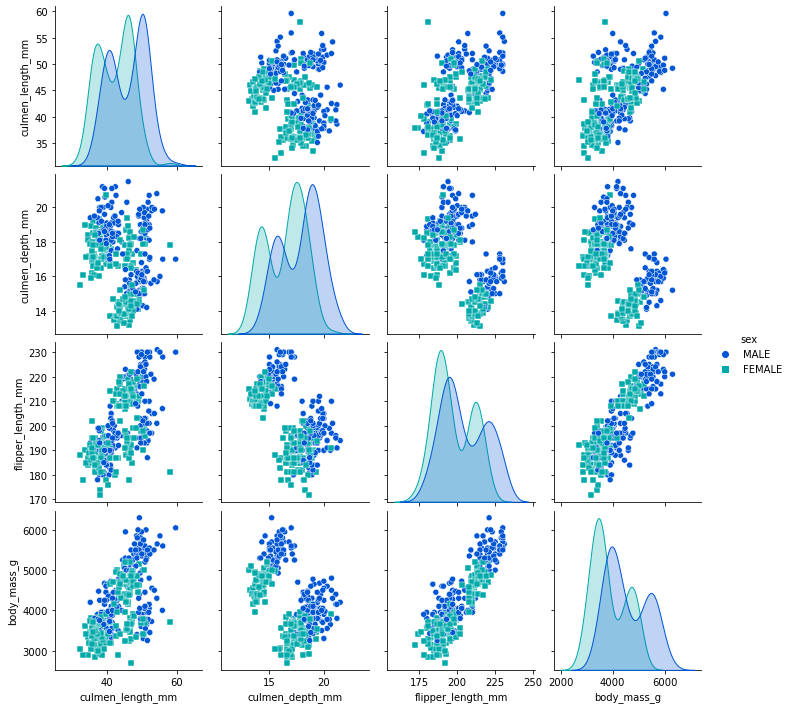

In [31]:
sns.pairplot(dfunsupervised, hue="sex", diag_kind="kde", markers=["o", "s"], palette="winter")
plt.show()

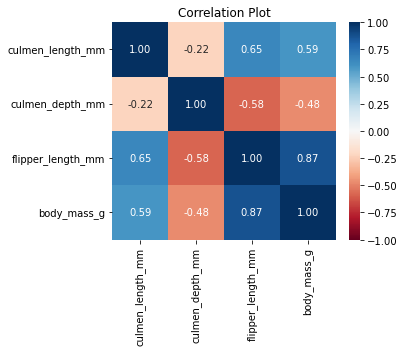

In [32]:
# Calculate the correlation matrix
correlation_matrix = dfunsupervised.corr()

# Plot the correlation matrix 
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

In [33]:
# doing an independent 2 sample t-test

In [34]:
from scipy.stats import ttest_ind
# Splitting the DataFrame based on the 'sex' column
male_data = dfunsupervised[dfunsupervised['sex'] == 'MALE']
female_data = dfunsupervised[dfunsupervised['sex'] == 'FEMALE']

In [35]:
# Performing the independent two-sample t-test on 'culmen_length_mm' for male and female groups
t_statisticcullen, p_valuecullen = ttest_ind(male_data['culmen_length_mm'], female_data['culmen_length_mm'])

# Printing the results
print("t-statistic culmen_length_mm:", t_statisticcullen)
print("P-value culmen_length_mm:", p_valuecullen)

t-statistic culmen_length_mm: 6.816101569584094
P-value culmen_length_mm: 4.458310888956517e-11


In [36]:
# Performing the independent two-sample t-test on 'culmen_depth_mm' for male and female groups
t_statisticculdep, p_valueculdep = ttest_ind(male_data['culmen_depth_mm'], female_data['culmen_depth_mm'])

# Printing the results
print("t-statistic culmen_depth_mm:", t_statisticculdep)
print("P-value culmen_depth_mm:", p_valueculdep)

t-statistic culmen_depth_mm: 7.223012992306065
P-value culmen_depth_mm: 3.5395904316159227e-12


In [37]:
# Performing the independent two-sample t-test on 'flipper_length_mm' for male and female groups
t_statisticfliplen, p_valuefliplen = ttest_ind(male_data['flipper_length_mm'], female_data['flipper_length_mm'])

# Printing the results
print("t-statistic flipper_length_mm:", t_statisticfliplen)
print("P-value flipper_length_mm:", p_valuefliplen)

t-statistic flipper_length_mm: 4.814769230513702
P-value flipper_length_mm: 2.248292028899214e-06


In [38]:
# Performing the independent two-sample t-test on 'body_mass_g' for male and female groups
t_statisticbm, p_valuebm = ttest_ind(male_data['body_mass_g'], female_data['body_mass_g'])

# Printing the results
print("t-statistic body_mass_g:", t_statisticbm)
print("P-value body_mass_g:", p_valuebm)

t-statistic body_mass_g: 8.527570011315659
P-value body_mass_g: 5.465793277643544e-16


In [39]:
# Create a DataFrame to store the results
results = pd.DataFrame(columns=['Feature', 'T-statistic', 'P-value'])

# Add the results for each feature
results = results.append({'Feature': 'culmen_length_mm', 't-statistic': t_statisticcullen, 'P-value': p_valuecullen}, ignore_index=True)
results = results.append({'Feature': 'culmen_depth_mm', 't-statistic': t_statisticculdep, 'P-value': p_valueculdep}, ignore_index=True)
results = results.append({'Feature': 'flipper_length_mm', 't-statistic': t_statisticfliplen, 'P-value': p_valuefliplen}, ignore_index=True)
results = results.append({'Feature': 'body_mass_g', 't-statistic': t_statisticbm, 'P-value': p_valuebm}, ignore_index=True)

# Print the results table
results

Feature T-statistic   P-value  t-statistic
0   culmen_length_mm         NaN       0.0     6.816102
1    culmen_depth_mm         NaN       0.0     7.223013
2  flipper_length_mm         NaN  0.000002     4.814769
3        body_mass_g         NaN       0.0     8.527570

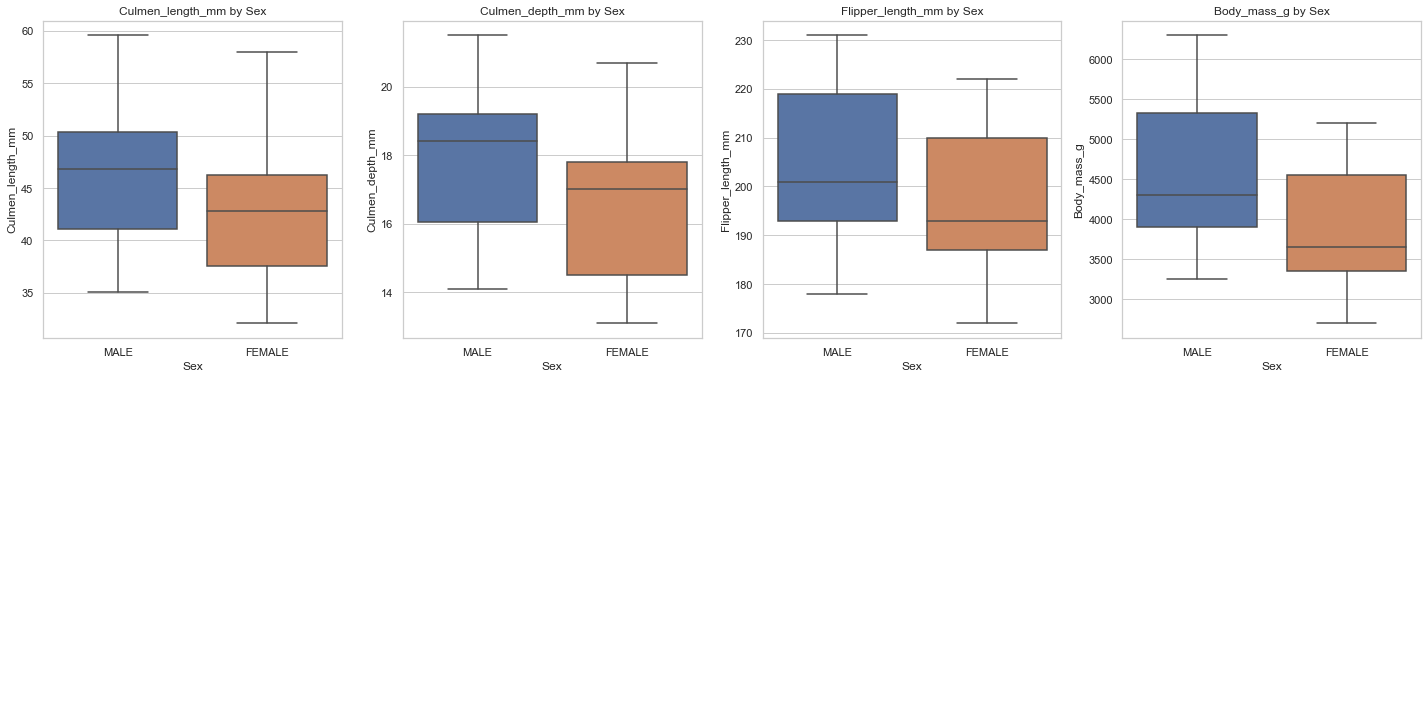

In [40]:
# Create box plots for each numeric feature based on the 'sex' column
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']


for i, feature in enumerate(numeric_features):
    sns.boxplot(x='sex', y=feature, data=dfunsupervised, ax=axs[i])
    axs[i].set_title(f'{feature.capitalize()} by Sex')
    axs[i].set_xlabel('Sex')
    axs[i].set_ylabel(f'{feature.capitalize()}')

for j in range(len(numeric_features), len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.show()


## Modeling

In [41]:
#Standardising numerical variables
from sklearn.preprocessing import StandardScaler
dfunsupervisednum=dfunsupervised[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]]
scaler = StandardScaler()
num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
dfunsupervisednum[num_cols] = scaler.fit_transform(dfunsupervised[num_cols])
dfunsupervisednum.head()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0         -0.903906         0.790360          -1.425342    -0.566948
1         -0.830434         0.126187          -1.068577    -0.504847
2         -0.683490         0.432728          -0.426399    -1.187953
4         -1.344738         1.096901          -0.569105    -0.939551
5         -0.867170         1.761074          -0.783164    -0.691149

In [42]:
# Using indicator function for categorical variables and encode using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = ['sex']
dfcategoricalunsuper = dfunsupervised[cat_cols]
dfcategoricalunsuper = pd.DataFrame(encoder.fit_transform(dfcategoricalunsuper), columns=encoder.get_feature_names(cat_cols), index=dfunsupervisednum.index)
dfcategoricalunsuper.head()

sex_FEMALE  sex_MALE
0         0.0       1.0
1         1.0       0.0
2         1.0       0.0
4         1.0       0.0
5         0.0       1.0

In [43]:
#merging them
dfunsuper_new = pd.merge(dfunsupervisednum, dfcategoricalunsuper, left_index=True, right_index=True, how='left')
print('Shape of dataframe:',dfunsuper_new.shape)
dfunsuper_new.head()

Shape of dataframe: (332, 6)


culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0         -0.903906         0.790360          -1.425342    -0.566948   
1         -0.830434         0.126187          -1.068577    -0.504847   
2         -0.683490         0.432728          -0.426399    -1.187953   
4         -1.344738         1.096901          -0.569105    -0.939551   
5         -0.867170         1.761074          -0.783164    -0.691149   

   sex_FEMALE  sex_MALE  
0         0.0       1.0  
1         1.0       0.0  
2         1.0       0.0  
4         1.0       0.0  
5         0.0       1.0

In [44]:
dfunsuper_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_FEMALE         332 non-null    float64
 5   sex_MALE           332 non-null    float64
dtypes: float64(6)
memory usage: 26.3 KB


## PCA

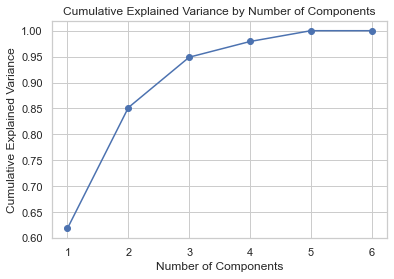

In [45]:
from sklearn.decomposition import PCA

# Perform PCA with n_components set to None to get all components
pca_all = PCA(n_components=None)
dfx_pca_all = pca_all.fit(dfunsuper_new)

# Get the explained variance ratio for each component
explained_variance_ratio = pca_all.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [46]:
# Perform PCA with n_components set to 0.85 to retain 85% of the variance
pca = PCA(n_components= 0.85)
dfx_pca = pca.fit(dfunsuper_new)

# Get the number of retained components
n_components = dfx_pca.n_components_
print("Number of components retaining 85% of the variance:", n_components)

# Transform the data using the selected number of components
penguins_PCA = pca.transform(dfunsuper_new)

Number of components retaining 85% of the variance: 2


## KMeans Clustering

In [47]:
#Elbow curve

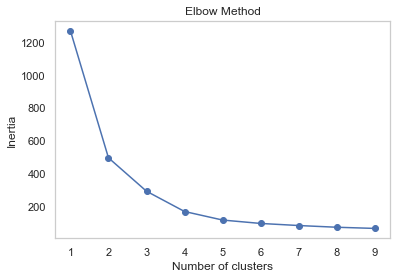

In [48]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(False)
plt.show()

In [49]:
#Kmeans clusters

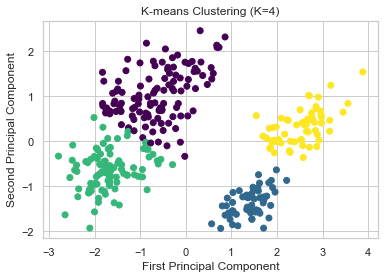

In [50]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(penguins_PCA)
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

## Dendogram

In [51]:
#dendogram using ward method

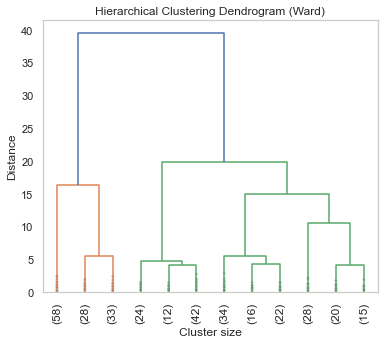

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Define the linkage methods to be used
linkage_methods = ['ward', 'complete', 'average']

hierarchical_models = {}
dendrograms = {}

for method in linkage_methods:
    Z = linkage(dfunsuper_new, method=method)
    dendrograms[method] = Z

# Plot dendrogram for 'ward'
plt.figure(figsize=(6, 5))
# Truncate the dendrogram to show only the last 'p' merged clusters
ax = dendrogram(dendrograms['ward'], truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.gca().grid(False)
plt.show()

## Gaussian Mixture Model

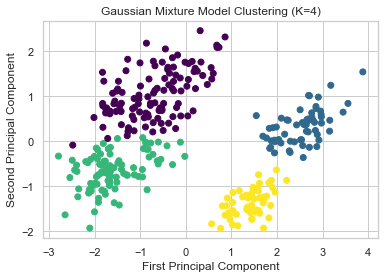

In [53]:
from sklearn.mixture import GaussianMixture

# Perform Gaussian Mixture Model clustering
n_components_gmm = 4  
gmm = GaussianMixture(n_components=n_components_gmm, random_state=42)
gmm.fit(penguins_PCA)
gmm_labels = gmm.predict(penguins_PCA)

# Plot GMM clustering results
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=gmm_labels, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"Gaussian Mixture Model Clustering (K={n_components_gmm})")
plt.show()


## DBSCAN

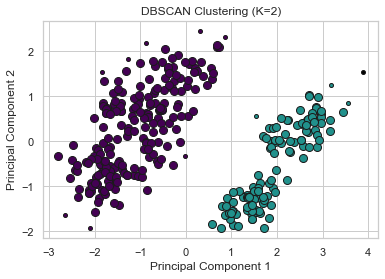

In [54]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

# Apply DBSCAN clustering
db = DBSCAN(eps=0.5, min_samples=5).fit(penguins_PCA)

# Extract labels and core samples mask
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

unique_labels = set(labels)
colors = [plt.cm.viridis(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = penguins_PCA[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

    xy = penguins_PCA[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=4)

plt.title(f"DBSCAN Clustering (K={n_clusters_})")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# Regression

#### Regression dataset source link:https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge/data


In [55]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
#uploading dataset

In [58]:
dfregression = pd.read_csv(r"D:\ML cw\Car Price Prediction - Regression\car_price_prediction.csv")

In [59]:
dfregression.head()

ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [60]:
#exploring the data set on data types, and whether it has null values

In [61]:
dfregression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [62]:
#no null values in the dataset

In [63]:
dfregression.shape

(19237, 18)

## Data Cleaning

In [64]:
#dropping duplicated rows

In [65]:
dfregression.drop_duplicates(inplace=True)

In [66]:
dfregression.shape

(18924, 18)

In [67]:
#there have been a few duplicated rows

In [68]:
#Levy and Mileage shoud not have data type object

In [69]:
# Check the number of unique values of each column

In [70]:
dfregression.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [71]:
#checking unique values of each column

In [72]:
for col in dfregression.columns:
    print(f'Category in {col} is :\n {dfregression[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


In [73]:
#removing price below 500

In [74]:
dfregression = dfregression[dfregression['Price'] >= 500]

In [75]:
#Doors '04-May' represents 4 to 5 doors and '02-Mar' represents 2 to 3 doors and '>5' represents doors more than 5

In [76]:
# Replace values in the 'Doors' column
dfregression['Doors'] = dfregression['Doors'].replace({'04-May': '4-5', '02-Mar': '2-3', '>5': '>5'})

In [77]:
#Replace '-' in Levy with 0
dfregression['Levy']=dfregression['Levy'].replace('-','0')

# Converting Levy type to float
dfregression['Levy'] = dfregression['Levy'].astype('float64')

In [78]:
print("Unique values in Levy\n",dfregression['Levy'].unique())

Unique values in Levy
 [ 1399.  1018.     0.   862.   446.   891.   761.   751.   394.  1053.
  1055.  1079.   810.  2386.  1850.   531.   586.  1249.  2455.   583.
  1537.  1288.   915.   707.  1077.  1486.  1091.   650.   382.  1436.
   503.  1017.  1104.   639.   629.   781.   530.   640.   765.   777.
   934.   769.   645.  1324.   830.  1187.  1111.   760.   642.  1604.
  1095.   966.   473.  1138.  1811.   988.   917.  1156.   687. 11714.
   836.   779.  1347.  2866.  1646.   609.   697.   585.   475.   690.
   308.  1823.  1361.  1273.   924.   584.  2078.   831.  1172.   893.
  1872.  1885.  1266.   447.  2148.  1730.   730.   502.   333.  1325.
   259.   247.   879.  1342.  1327.  1598.  1514.   738.  1935.   481.
  1522.  1282.   456.   880.   900.   798.  1277.   442.  1051.   790.
  1292.  1047.   528.  1211.  1793.   919.   574.   930.  1058.  1998.
   271.   706.  1481.  1677.  1661.  1286.  1408.  1090.   595.  1451.
  1267.   993.  1714.   878.   641.   749.  1511.   60

In [79]:
#remove km in mileage column

In [80]:
# Replacing 'Km' with ''  
dfregression['Mileage'] =dfregression['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
dfregression.Mileage = dfregression.Mileage.astype('Int64')

In [81]:
print("Unique values in Mileage\n",dfregression['Mileage'].unique())

Unique values in Mileage
 <IntegerArray>
[    186005,     192000,     200000,     168966,      91901,     160931,
     258909,     216118,     398069,     128500,
 ...
 1111111111,     180234,     135410,      18500,      52456,      65691,
     158130,      23430,     132700,     140607]
Length: 7258, dtype: Int64


In [82]:
#removing turbo under engine volume and making it float and adding a column whether it is turbo or not

# Creating a new column to indicate turbocharged engines
dfregression['Turbocharged'] = dfregression['Engine volume'].apply(lambda x: 'Turbo' if 'Turbo' in str(x) else 'Not Turbo')

# Removing 'Turbo' from 'Engine volume' column
dfregression['Engine volume'] = dfregression['Engine volume'].str.replace(' Turbo', '')

# Converting 'Engine volume' to float
dfregression['Engine volume'] = dfregression['Engine volume'].astype('float64')

In [83]:
dfregression['Turbocharged'].value_counts()

Not Turbo    15434
Turbo         1857
Name: Turbocharged, dtype: int64

In [84]:
#'Prod. year' is not useful, therefore it is dropped and a new column called 'Car Age' will be created

In [85]:
import datetime as dt
dtime = dt.datetime.now()
dfregression['Car Age']=dtime.year - dfregression['Prod. year']
dfregression = dfregression.drop('Prod. year',axis=1)

In [86]:
#dropping 'ID' column as it is a unique value and not useful for car prediction

In [87]:
dfregression.drop(['ID'], axis=1, inplace=True)

In [88]:
dfregression.head()

Price    Levy Manufacturer    Model   Category Leather interior Fuel type  \
0  13328  1399.0        LEXUS   RX 450       Jeep              Yes    Hybrid   
1  16621  1018.0    CHEVROLET  Equinox       Jeep               No    Petrol   
2   8467     0.0        HONDA      FIT  Hatchback               No    Petrol   
3   3607   862.0         FORD   Escape       Jeep              Yes    Hybrid   
4  11726   446.0        HONDA      FIT  Hatchback              Yes    Petrol   

   Engine volume  Mileage  Cylinders Gear box type Drive wheels Doors  \
0            3.5   186005        6.0     Automatic          4x4   4-5   
1            3.0   192000        6.0     Tiptronic          4x4   4-5   
2            1.3   200000        4.0      Variator        Front   4-5   
3            2.5   168966        4.0     Automatic          4x4   4-5   
4            1.3    91901        4.0     Automatic        Front   4-5   

              Wheel   Color  Airbags Turbocharged  Car Age  
0        Left wheel  Silver       12    Not Turbo       14  
1        Left wheel   Black        8    Not Turbo       13  
2  Right-hand drive   Black        2    Not Turbo       18  
3        Left wheel   White        0    Not Turbo       13  
4        Left wheel  Silver        4    Not Turbo       10

In [89]:
dfregression.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17291 entries, 0 to 19235
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17291 non-null  int64  
 1   Levy              17291 non-null  float64
 2   Manufacturer      17291 non-null  object 
 3   Model             17291 non-null  object 
 4   Category          17291 non-null  object 
 5   Leather interior  17291 non-null  object 
 6   Fuel type         17291 non-null  object 
 7   Engine volume     17291 non-null  float64
 8   Mileage           17291 non-null  Int64  
 9   Cylinders         17291 non-null  float64
 10  Gear box type     17291 non-null  object 
 11  Drive wheels      17291 non-null  object 
 12  Doors             17291 non-null  object 
 13  Wheel             17291 non-null  object 
 14  Color             17291 non-null  object 
 15  Airbags           17291 non-null  int64  
 16  Turbocharged      17291 non-null  object

In [90]:
dfregression.shape

(17291, 18)

In [91]:
dfregression.describe()

Price          Levy  Engine volume       Mileage     Cylinders  \
count  1.729100e+04  17291.000000   17291.000000  1.729100e+04  17291.000000   
mean   2.031866e+04    620.695448       2.286016  1.497552e+06      4.553872   
std    2.009179e+05    564.832773       0.858156  4.763244e+07      1.184012   
min    5.000000e+02      0.000000       0.000000  0.000000e+00      1.000000   
25%    7.683000e+03      0.000000       1.800000  7.002350e+04      4.000000   
50%    1.442600e+04    642.000000       2.000000  1.249120e+05      4.000000   
75%    2.352100e+04    891.000000       2.500000  1.853180e+05      4.000000   
max    2.630750e+07  11714.000000      20.000000  2.147484e+09     16.000000   

            Airbags       Car Age  
count  17291.000000  17291.000000  
mean       6.469319     13.148170  
std        4.203791      5.673477  
min        0.000000      4.000000  
25%        4.000000      9.000000  
50%        4.000000     12.000000  
75%       12.000000     15.000000  
max       16.000000     81.000000

In [92]:
#assuming to predict prices only for certain types of cars; Jeep, Hatchback, Sedan and Minivan

In [93]:
# Filter rows based on the specified categories
filtered_dfregression = dfregression[dfregression['Category'].isin(['Jeep', 'Hatchback', 'Sedan', 'Minivan'])]

In [94]:
filtered_dfregression.shape

(15822, 18)

## Exploratory Data Analysis

In [95]:
# Distribution of Numerical Features

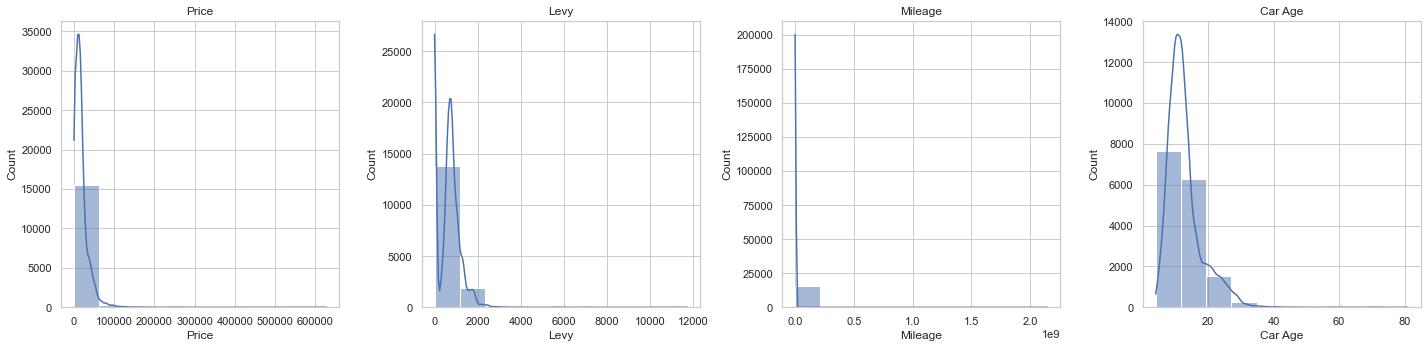

In [96]:
numericalfeatures = ['Price', 'Levy', 'Mileage', 'Car Age']

plt.figure(figsize=(25,5))  # Increase the size of the figure

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data=filtered_dfregression[feature], bins=10, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [97]:
#removing outliers using percentile method

In [98]:
# max and min Quantile
max_val = filtered_dfregression.quantile(0.95)
min_val = filtered_dfregression.quantile(0.05)

# removing all the outliers
dfreg = filtered_dfregression[
   (filtered_dfregression['Price'] > min_val['Price']) & (filtered_dfregression['Price'] < max_val['Price']) &
   (filtered_dfregression['Levy'] > min_val['Levy']) & (filtered_dfregression['Levy'] < max_val['Levy']) &
   (filtered_dfregression['Mileage'] > min_val['Mileage']) & (filtered_dfregression['Mileage'] < max_val['Mileage']) &
   (filtered_dfregression['Car Age'] > min_val['Car Age']) & (filtered_dfregression['Car Age'] < max_val['Car Age'])
]

dfreg.head()

Price    Levy Manufacturer     Model   Category Leather interior Fuel type  \
0  13328  1399.0        LEXUS    RX 450       Jeep              Yes    Hybrid   
1  16621  1018.0    CHEVROLET   Equinox       Jeep               No    Petrol   
3   3607   862.0         FORD    Escape       Jeep              Yes    Hybrid   
4  11726   446.0        HONDA       FIT  Hatchback              Yes    Petrol   
5  39493   891.0      HYUNDAI  Santa FE       Jeep              Yes    Diesel   

   Engine volume  Mileage  Cylinders Gear box type Drive wheels Doors  \
0            3.5   186005        6.0     Automatic          4x4   4-5   
1            3.0   192000        6.0     Tiptronic          4x4   4-5   
3            2.5   168966        4.0     Automatic          4x4   4-5   
4            1.3    91901        4.0     Automatic        Front   4-5   
5            2.0   160931        4.0     Automatic        Front   4-5   

        Wheel   Color  Airbags Turbocharged  Car Age  
0  Left wheel  Silver       12    Not Turbo       14  
1  Left wheel   Black        8    Not Turbo       13  
3  Left wheel   White        0    Not Turbo       13  
4  Left wheel  Silver        4    Not Turbo       10  
5  Left wheel   White        4    Not Turbo        8

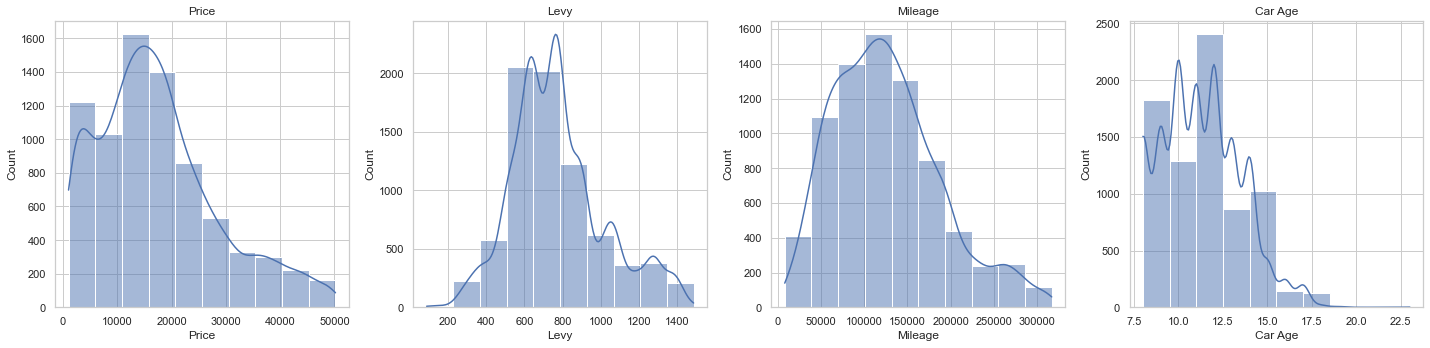

In [99]:
numericalfeatures = ['Price', 'Levy', 'Mileage', 'Car Age']

plt.figure(figsize=(25,5))

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data=dfreg[feature], bins=10, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [100]:
#doing log transformation for car age and square root for Price and Mileage 

In [101]:
import numpy as np

datareg = dfreg.copy()

datareg['Price'] = np.sqrt(datareg['Price'])
datareg['Mileage'] = np.sqrt(datareg['Mileage'])
datareg['Car Age'] = np.log10(datareg['Car Age']+1)

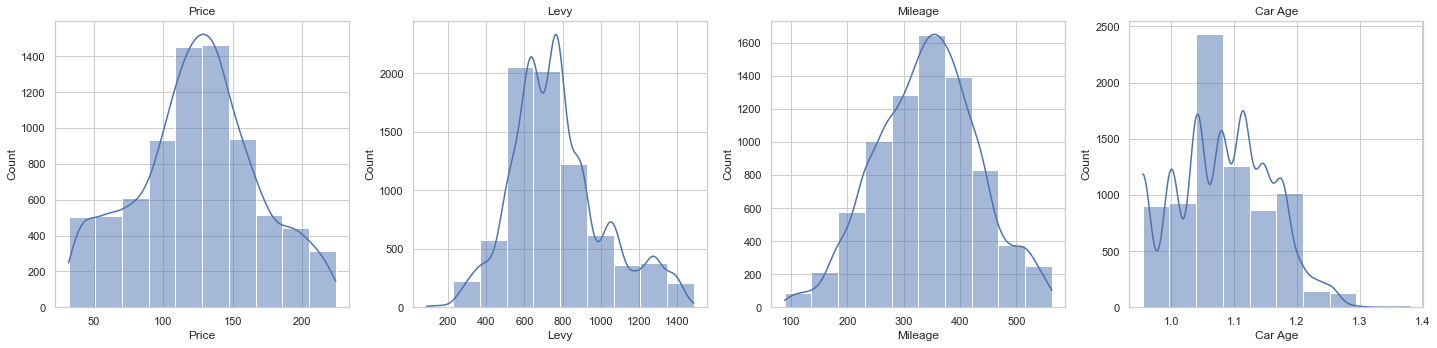

In [102]:
numericalfeatures = ['Price', 'Levy', 'Mileage', 'Car Age']

plt.figure(figsize=(25,5))  # Increase the size of the figure

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(1, 5, i)
    sns.histplot(data=datareg[feature], bins=10, kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [103]:
datareg.describe()

Price         Levy  Engine volume      Mileage    Cylinders  \
count  7673.000000  7673.000000    7673.000000  7673.000000  7673.000000   
mean    124.576780   775.510491       2.119692   342.795317     4.285156   
std      43.774155   242.332060       0.628459    89.840996     0.808105   
min      31.921779    87.000000       0.000000    88.317609     1.000000   
25%      96.994845   638.000000       1.600000   279.284801     4.000000   
50%     125.223800   761.000000       2.000000   345.825100     4.000000   
75%     152.338439   891.000000       2.500000   401.997512     4.000000   
max     224.044638  1488.000000       5.000000   563.121656    12.000000   

           Airbags      Car Age  
count  7673.000000  7673.000000  
mean      6.498501     1.081602  
std       4.073142     0.077165  
min       0.000000     0.954243  
25%       4.000000     1.041393  
50%       4.000000     1.079181  
75%      12.000000     1.146128  
max      16.000000     1.380211

In [104]:
datareg.shape

(7673, 18)

In [105]:
#box plot to visualise the transformation

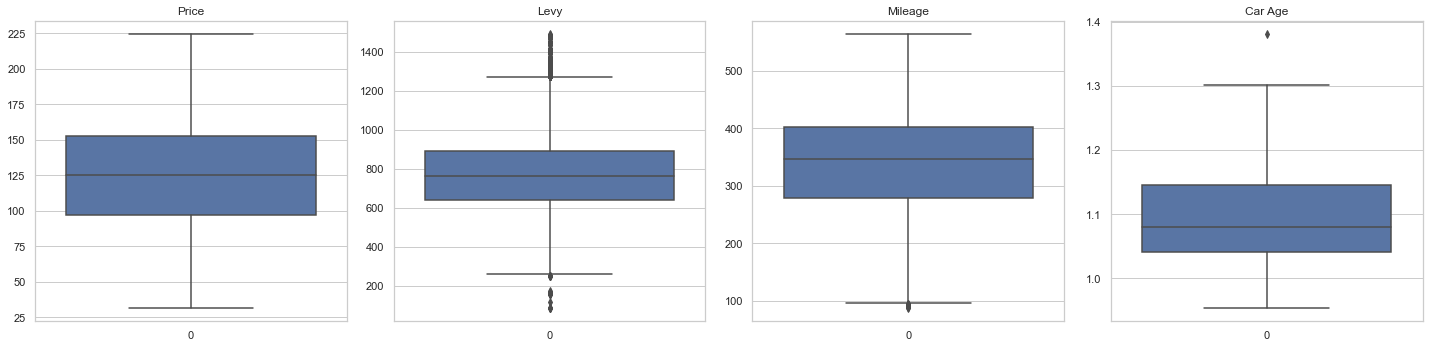

In [106]:
numericalfeatures = ['Price', 'Levy', 'Mileage', 'Car Age']

plt.figure(figsize=(25, 5))

for i, feature in enumerate(numericalfeatures, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(data=datareg[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


In [107]:
#Distribution of categorical variables 

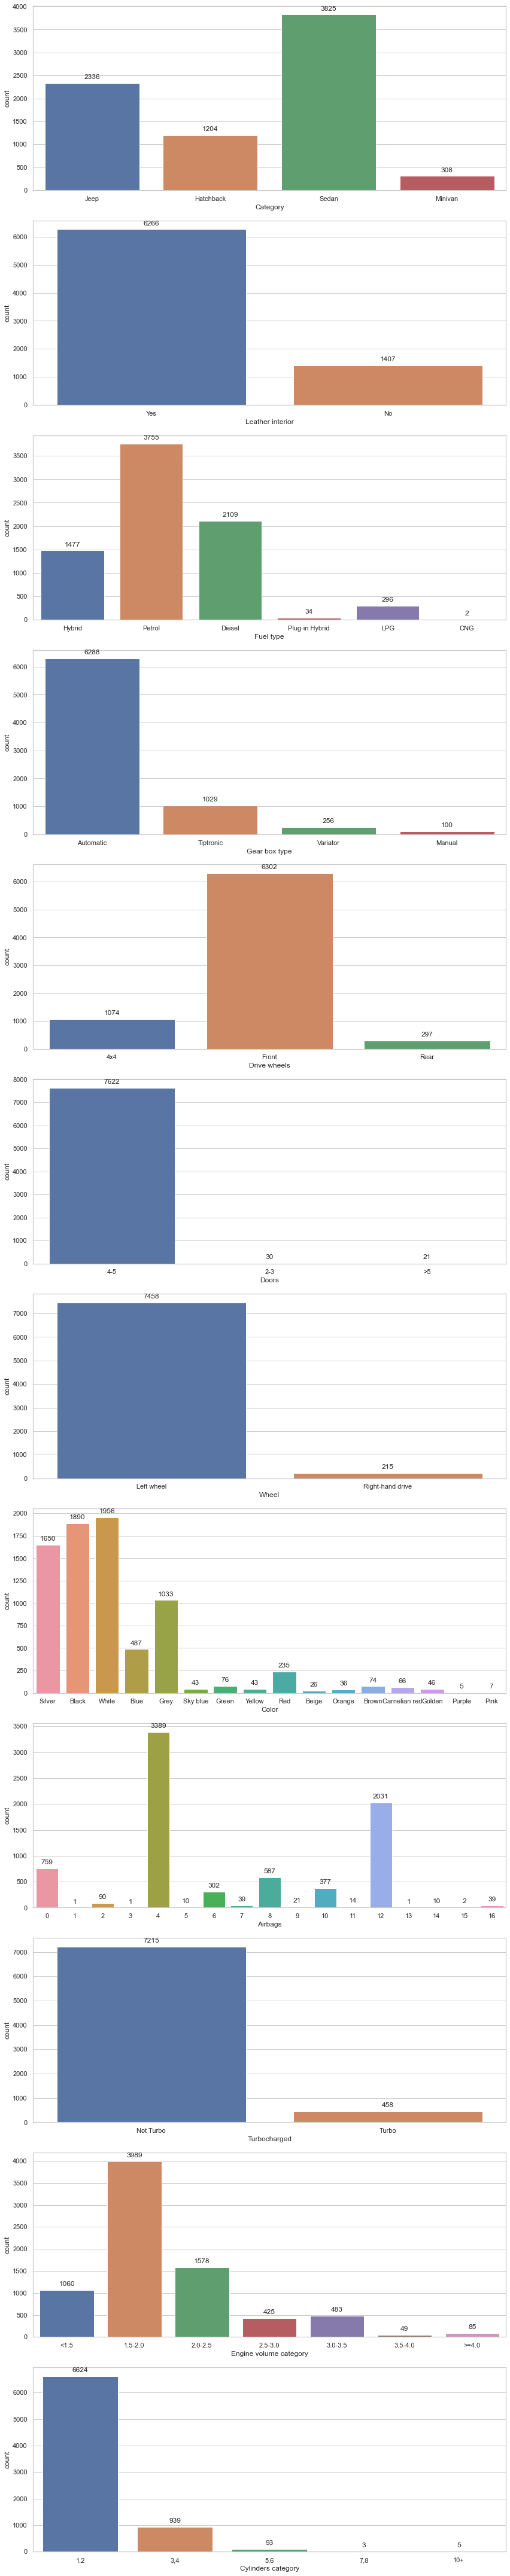

In [108]:
categorical_vars = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbocharged']

engine_volume_bins = [0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, float('inf')]
engine_volume_labels = ['<1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0', '>=4.0']
cylinders_bins = [2, 4, 6, 8, 10, float('inf')]
cylinders_labels = ['1,2', '3,4', '5,6', '7,8', '10+']

datareg['Engine volume category'] = pd.cut(datareg['Engine volume'], bins=engine_volume_bins, labels=engine_volume_labels)
datareg['Cylinders category'] = pd.cut(datareg['Cylinders'], bins=cylinders_bins, labels=cylinders_labels)

categorical_vars.extend(['Engine volume category', 'Cylinders category'])

fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(12, 5*len(categorical_vars)))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, data=datareg, ax=axes[i])
    for p in axes[i].patches:
        axes[i].annotate(format(p.get_height(), '.0f'),
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 10), 
                         textcoords='offset points')

plt.tight_layout()
plt.show()


In [109]:
#for visualisation purposes we only take top 30 for Manufacturer and Model

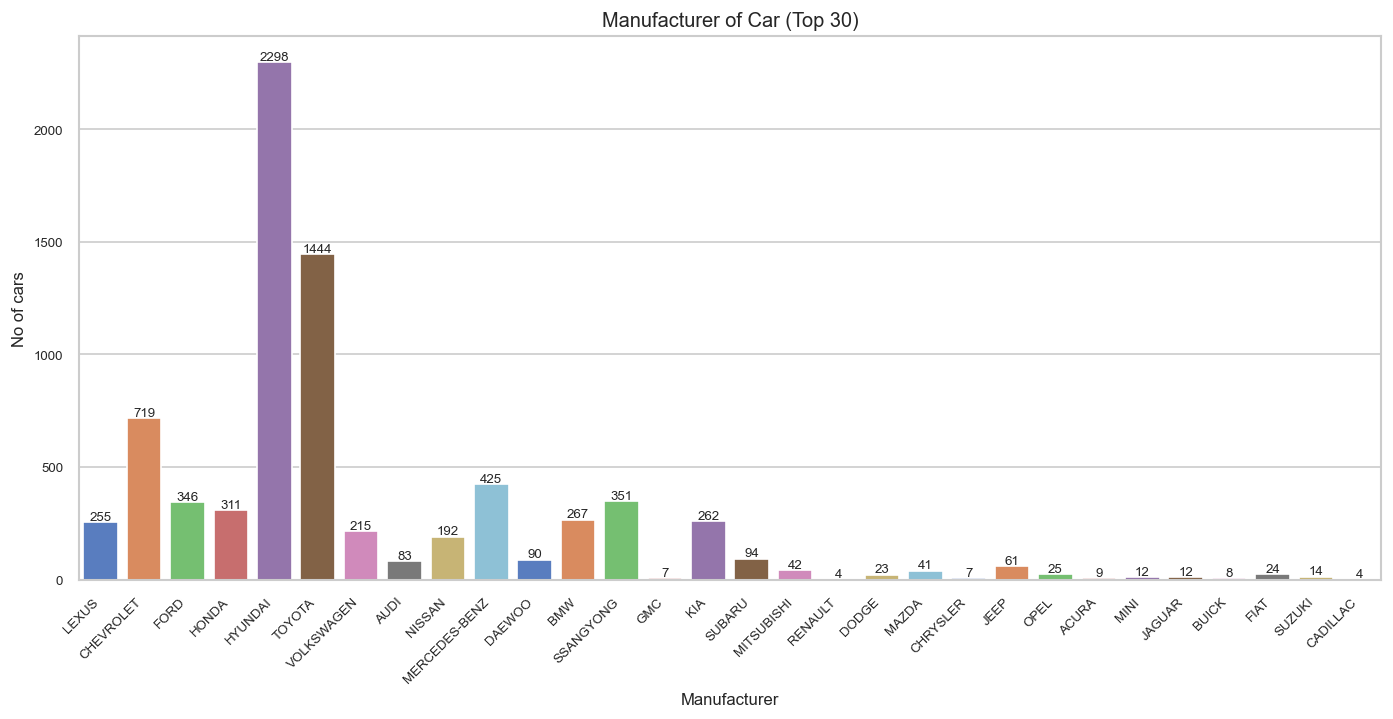

In [110]:
top_manufacturers = datareg['Manufacturer'].value_counts().head(30).index
df_top_manufacturers = datareg[datareg['Manufacturer'].isin(top_manufacturers)]

fig, ax = plt.subplots(figsize=(14, 6), dpi=120)
sns.countplot(data=df_top_manufacturers, x='Manufacturer', palette='muted', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Manufacturer of Car (Top 30)", fontsize=12)
plt.xlabel("Manufacturer", fontsize=10)
plt.ylabel("No of cars", fontsize=10)
ax.tick_params(axis='both', labelsize=8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, 
                xytext=(0, 3), textcoords='offset points')

plt.show()


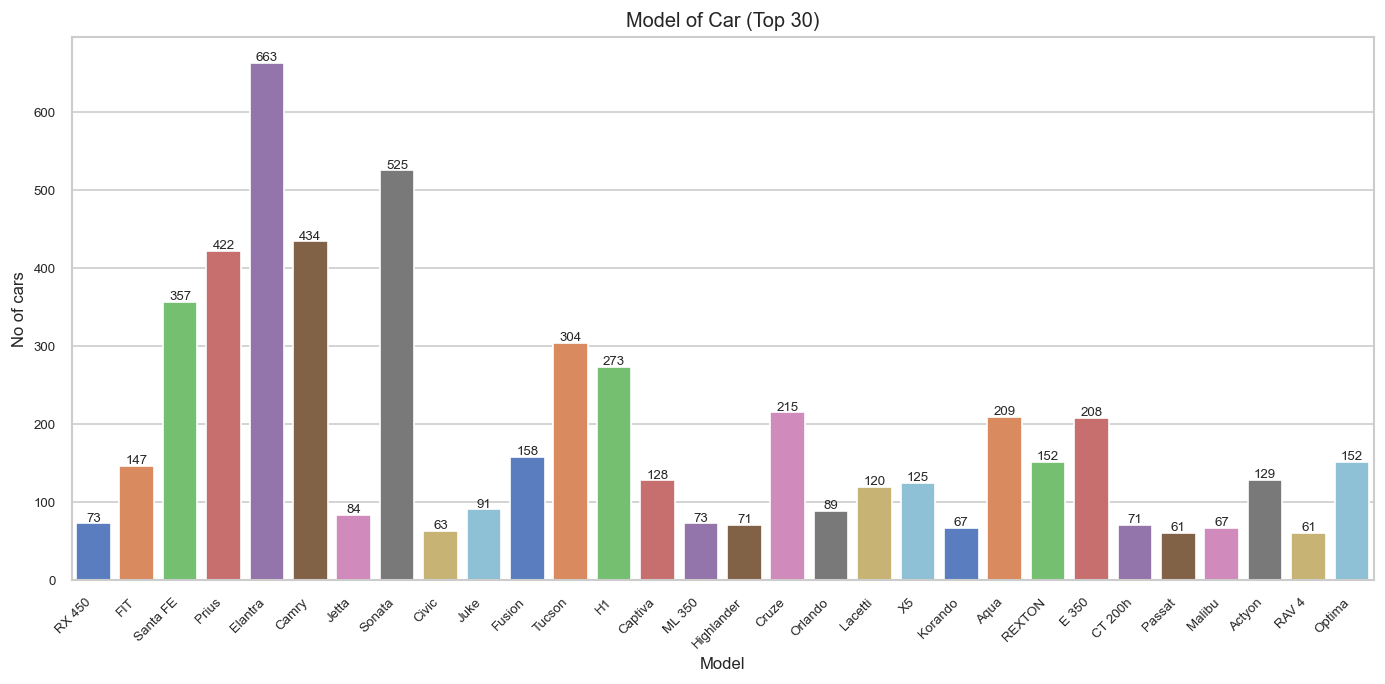

In [111]:
top_models = datareg['Model'].value_counts().head(30).index
df_top_models = datareg[datareg['Model'].isin(top_models)]

fig, ax = plt.subplots(figsize=(14, 6), dpi=120)
sns.countplot(data=df_top_models, x='Model', palette='muted', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title("Model of Car (Top 30)", fontsize=12)
plt.xlabel("Model", fontsize=10)
plt.ylabel("No of cars", fontsize=10)
ax.tick_params(axis='both', labelsize=8)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=8, 
                xytext=(0, 3), textcoords='offset points')

plt.show()

In [112]:
#Which manufacturers produce the most expensive cars on average?

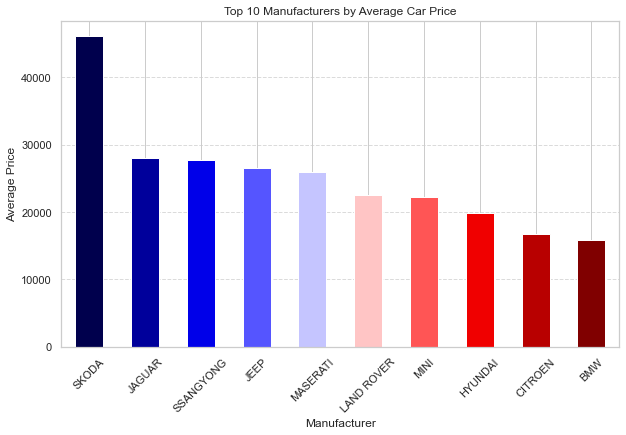

In [113]:
#  average price for each manufacturer
# Reversing the square root transformation for visualisation purposes
average_prices = (datareg.groupby('Manufacturer')['Price'].mean()) ** 2 

# Sort the manufacturers based on average price and select the top 10
top_10_manufacturers = average_prices.sort_values(ascending=False).head(10)

# Create a bar chart with 'spring' colormap
plt.figure(figsize=(10, 6))
top_10_manufacturers.plot(kind='bar', color=plt.cm.seismic(np.linspace(0, 1, 10)))  # Using spring colormap
plt.title('Top 10 Manufacturers by Average Car Price')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


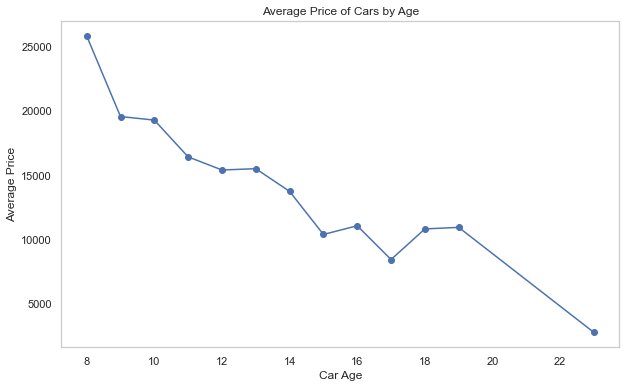

In [114]:
# Reverse the transformations temporarily for visualization
datareg_temp = datareg.copy()
datareg_temp['Price'] = datareg_temp['Price'] ** 2
datareg_temp['Mileage'] = datareg_temp['Mileage'] ** 2
datareg_temp['Car Age'] = 10 ** datareg_temp['Car Age'] - 1

# Grouping the data by car age and calculating the average price for each age
average_price_by_age = datareg_temp.groupby('Car Age')['Price'].mean()

# Creating a line plot
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_age.index, average_price_by_age.values, marker='o', linestyle='-')
plt.xlabel('Car Age')
plt.ylabel('Average Price')
plt.title('Average Price of Cars by Age')
plt.grid(False)
plt.show()


In [115]:
#correlation matrix for the variables

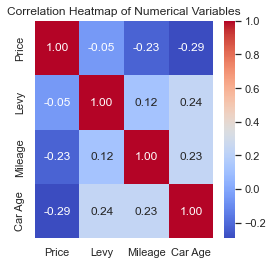

In [116]:
numerical_cols = ['Price', 'Levy', 'Mileage', 'Car Age']

# Calculating the correlation matrix for numerical varibles
correlation_matrix = datareg[numerical_cols].corr()

plt.figure(figsize=(4,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [117]:
#making a price column categorical to see the relationship between categoricol variables
# Define the number of intervals
num_intervals = 10

# Create 'Price_Category' column using pd.cut()
datareg['Price_Category'] = pd.cut(datareg['Price'], bins=num_intervals)

In [118]:
#correlation of categorical variables using Cramer's V

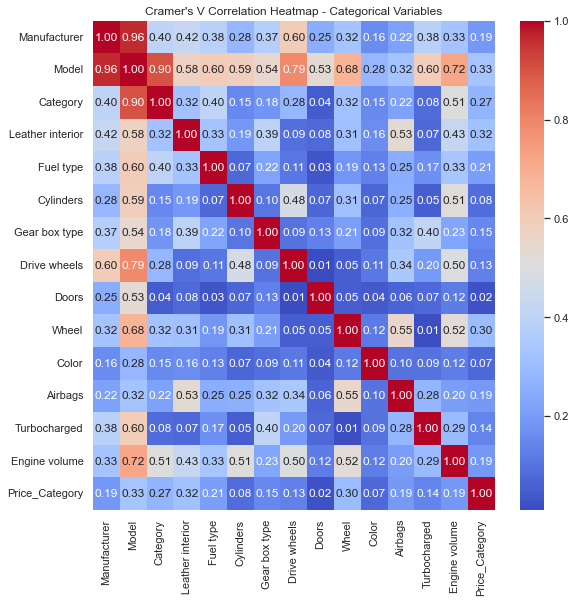

In [119]:
from scipy.stats import chi2_contingency

# Selecting categorical columns
categorical_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color', 'Airbags', 'Turbocharged','Engine volume','Price_Category']

# Create a function to calculate Cramer's V statistic
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Calculate Cramer's V statistic for all pairs of categorical variables
cramer_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cramer_v_matrix.loc[col1, col2] = cramers_v(datareg[col1], datareg[col2])

cramer_v_matrix = cramer_v_matrix.astype(float)

plt.figure(figsize=(9, 9))
sns.heatmap(cramer_v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cramer\'s V Correlation Heatmap - Categorical Variables')
plt.show()

In [120]:
#standardising the variables except for categorical data

In [121]:
from sklearn.preprocessing import StandardScaler
dfnumreg=datareg[['Price', 'Levy', 'Mileage', 'Car Age']]
scaler = StandardScaler()
num_cols = ['Price', 'Levy', 'Mileage', 'Car Age']
dfnumreg[num_cols] = scaler.fit_transform(datareg[num_cols])
dfnumreg.head()
dfnumreg.shape
dfnumreg

Price      Levy   Mileage   Car Age
0     -0.208580  2.573040  0.985000  1.224583
1      0.099281  1.000715  1.061753  0.836258
3     -1.473990  0.356928  0.759830  0.836258
4     -0.372164 -1.359836 -0.441292 -0.521117
5      1.694071  0.476607  0.649710 -1.650587
...         ...       ...       ...       ...
19227  1.097288  1.145154  1.393787 -0.521117
19231 -1.105883  1.153408 -0.161031 -0.031375
19233  0.014782  0.228996  0.658982  0.836258
19234  0.845369  0.249630 -0.018614  1.224583
19235 -1.178011  2.114961 -1.295629  2.250776

[7673 rows x 4 columns]

In [122]:
# Convert categorical variables to indicator variables and encode using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = categorical_cols = ['Manufacturer','Model','Doors','Category', 'Leather interior', 'Fuel type', 'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Airbags', 'Turbocharged','Engine volume']
dfcategoricalreg = datareg[cat_cols]
dfcategoricalreg = pd.DataFrame(encoder.fit_transform(dfcategoricalreg), columns=encoder.get_feature_names(cat_cols), index=dfnumreg.index)
dfcategoricalreg.head()
dfcategoricalreg.shape

(7673, 668)

In [123]:
#mergind them

In [124]:
dfregression_new = pd.merge(dfcategoricalreg, dfnumreg, left_index=True, right_index=True, how='left')

In [125]:
dfregression_new.shape

(7673, 672)

In [126]:
#dropping predictor variable to predict

In [127]:
dfregressiontest= dfregression_new.drop(columns=["Price"])
dfregressiontest.head()

Manufacturer_ACURA  Manufacturer_AUDI  Manufacturer_BMW  \
0                 0.0                0.0               0.0   
1                 0.0                0.0               0.0   
3                 0.0                0.0               0.0   
4                 0.0                0.0               0.0   
5                 0.0                0.0               0.0   

   Manufacturer_BUICK  Manufacturer_CADILLAC  Manufacturer_CHEVROLET  \
0                 0.0                    0.0                     0.0   
1                 0.0                    0.0                     1.0   
3                 0.0                    0.0                     0.0   
4                 0.0                    0.0                     0.0   
5                 0.0                    0.0                     0.0   

   Manufacturer_CHRYSLER  Manufacturer_CITROEN  Manufacturer_DAEWOO  \
0                    0.0                   0.0                  0.0   
1                    0.0                   0.0                  0.0   
3                    0.0                   0.0                  0.0   
4                    0.0                   0.0                  0.0   
5                    0.0                   0.0                  0.0   

   Manufacturer_DAIHATSU  ...  Engine volume_4.0  Engine volume_4.2  \
0                    0.0  ...                0.0                0.0   
1                    0.0  ...                0.0                0.0   
3                    0.0  ...                0.0                0.0   
4                    0.0  ...                0.0                0.0   
5                    0.0  ...                0.0                0.0   

   Engine volume_4.4  Engine volume_4.5  Engine volume_4.6  Engine volume_4.7  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   
5                0.0                0.0                0.0                0.0   

   Engine volume_5.0      Levy   Mileage   Car Age  
0                0.0  2.573040  0.985000  1.224583  
1                0.0  1.000715  1.061753  0.836258  
3                0.0  0.356928  0.759830  0.836258  
4                0.0 -1.359836 -0.441292 -0.521117  
5                0.0  0.476607  0.649710 -1.650587  

[5 rows x 671 columns]

In [128]:
dfregressiontest.shape

(7673, 671)

In [129]:
#predicting 

In [130]:
y=np.array(dfregression_new['Price'])

In [131]:
#data preperation Train,Test,Split

In [132]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfregressiontest, y, test_size=0.2, random_state=0)

## Multiple Linear Regression

In [133]:
#PCA is done only for multiple linear regression so that all assumptions will be valid

In [134]:
from sklearn.decomposition import PCA
# Retain components that explain 98% of the variance
pca = PCA(n_components=0.98) 
reduced = pca.fit_transform(dfregressiontest)

# Convert the reduced_categorical array to a DataFrame
reduceddf = pd.DataFrame(reduced, columns=[f'PC{i}' for i in range(1, reduced.shape[1] + 1)])
reduceddf.index = dfregressiontest.index

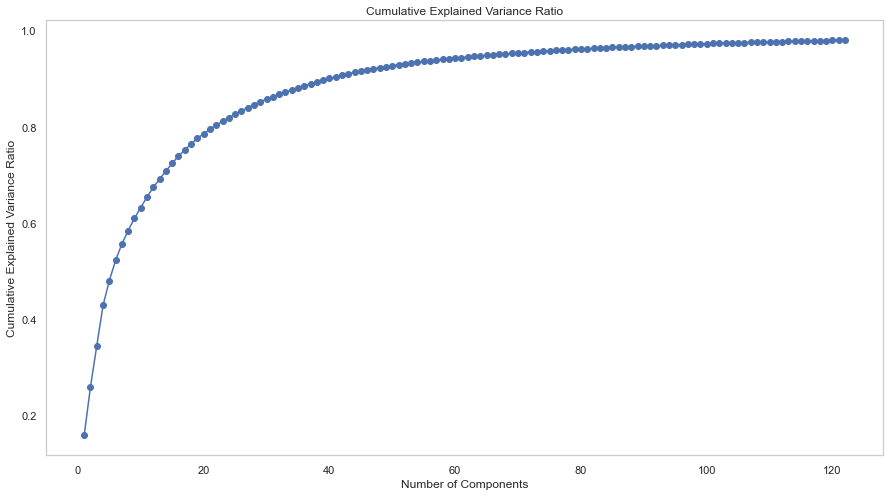

In [135]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(15,8))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(False)
plt.show()


In [136]:
reduceddf.shape

(7673, 122)

In [137]:
reduceddf.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.511463  1.004845  0.173864 -0.326344  0.396974 -0.088646 -0.556436   
1  2.137327  0.202671  0.925666 -0.544157  0.183103 -0.809615  1.720852   
3  1.366148 -0.374662 -0.080647 -0.216335  0.785222 -0.610009 -0.253039   
4 -1.465951 -0.489568 -0.074191  0.239888  0.276598 -0.142411  0.149486   
5 -0.365161  0.804051 -2.041002 -0.967932  0.530703  0.525181  0.391649   

        PC8       PC9      PC10  ...     PC113     PC114     PC115     PC116  \
0 -0.439083  0.015905  0.286375  ... -0.005997  0.001315  0.004339  0.003933   
1  0.089931 -0.253388  0.189006  ... -0.063283 -0.166645  0.061527  0.042361   
3 -0.292961  0.608777 -0.131782  ...  0.057237  0.066099  0.015249 -0.010870   
4 -1.081636 -0.507491  0.140420  ... -0.027274  0.012257  0.017093 -0.005236   
5  0.177465  0.778287 -0.284493  ... -0.003777  0.000190  0.003655  0.001660   

      PC117     PC118     PC119     PC120     PC121     PC122  
0  0.006620  0.005191 -0.004117 -0.000713  0.005701  0.012426  
1  0.042676  0.019820  0.061658  0.019032  0.022751  0.037478  
3 -0.024580 -0.036154  0.036449 -0.063620  0.032085  0.016561  
4  0.016002  0.040827 -0.022023  0.011479  0.024345  0.009321  
5  0.008587  0.004561 -0.002057  0.007415 -0.001682  0.006525  

[5 rows x 122 columns]

In [138]:
#data splitting for PCA 

In [139]:
from sklearn.model_selection  import train_test_split
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(reduceddf, y, test_size=0.2, random_state=0)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a LinearRegression model
linear_model= LinearRegression()

# Perform cross-validation
cv_scores = cross_val_score(linear_model, Xpca_train, ypca_train, cv=5)  

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

# Train the model 
linear_model.fit(Xpca_train, ypca_train)

# print the model coefficients and intercept
print("Model Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)


Cross-Validation Scores: [0.52216999 0.57234444 0.56897979 0.5926913  0.58733594]
Mean Cross-Validation Score: 0.5687042909395806
Model Coefficients: [-0.21145481  0.27419537 -0.29736887  0.05543792  0.15405911  0.04078074
  0.37238704  0.31233889  0.08735808  0.40281698 -0.25825577 -0.18141269
  0.21955981  0.04674463 -0.12504346  0.05917671  0.12239048  0.66369061
  0.33122745  0.0728785  -0.0307416  -0.19844555  0.06632814  0.41562668
 -0.08536027  0.02993791  0.12334453 -0.47008132 -0.32676074  0.02760187
  0.3066893   0.424165   -0.12629653 -0.16819968 -0.22613867  0.11702716
  0.5215265  -0.24986049 -0.04662511  0.28277528 -0.31447093 -0.06237882
  0.40261489  0.05002798  0.38039791 -0.36348041  0.08582735  0.15219798
  0.14171482  0.02069892  0.27051586 -0.11018487 -0.18178909 -0.36978774
  0.11298736  0.36558064 -0.17903229  0.10816495 -0.6124969   0.36021677
 -0.23611294  0.28027355 -0.30418627 -0.9057368  -0.39830369 -0.15990331
  0.07607071 -0.02473517 -0.14779725  0.2269933

In [141]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = linear_model.predict(Xpca_test)

print("LR Mean Squared Error: {}".format(mean_squared_error(ypca_test, y_pred)))
print("LR Mean Absolute Error: {}".format(mean_absolute_error(ypca_test, y_pred))) 
print("LR Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(ypca_test, y_pred))))
print("LR R Squared: {}".format(r2_score(ypca_test, y_pred)))

LR Mean Squared Error: 0.4181034793579544
LR Mean Absolute Error: 0.49663940951681285
LR Root Mean Squared Error: 0.6466092168829287
LR R Squared: 0.579098171860247


In [142]:
#Checking whether multiple linear regression assumptions hold

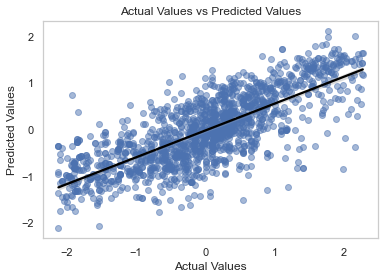

In [143]:
#relationship between the actual values (y_test) and the predicted values (y_pred) 
sns.regplot(x=ypca_test, y=y_pred, scatter_kws={'alpha':0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')
plt.grid(False)
plt.show()

In [144]:
#residual error diagnosis

In [145]:
residuals=ypca_test-y_pred

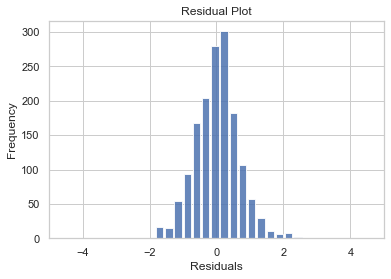

In [146]:
# Plot histogram of residuals
plt.hist(residuals, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-5, 5])
plt.title('Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

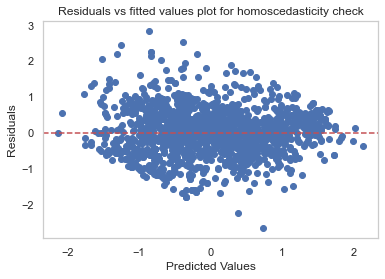

In [147]:
#Checking assumption that errors are homoscedastic
# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.grid(False)
plt.show()

#### Testing whether autocorrelation is an issue using the Durbin Watson hypothesis test .

#### Null Hypothesis (H0): There is no autocorrelation present in the residuals of the model.

#### Alternative Hypothesis (H1): Autocorrelation exists in the residuals of the model.¶

In [148]:
from statsmodels.stats.stattools import durbin_watson
dw_statisticlinear = durbin_watson(residuals)
print("Durbin-Watson statistic:", dw_statisticlinear)

Durbin-Watson statistic: 1.9064910602673921


#### Given that the Durbin-Watson test statistic falls within the range of 1.5 and 2.5, we fail to reject the null hypothesis at the 5% significance level. Therefore, based on the statistical analysis, we conclude that there is no evidence to suggest that the model suffers from autocorrelation.As a result, it appears that all the underlying assumptions of the linear regression model, including the assumption of independent errors, are satisfied. Consequently, we can infer that the multiple linear regression model provides a suitable fit for the data.¶

## Ridge Regression

In [149]:
from sklearn.linear_model import RidgeCV

# Create RidgeCV model with optional cv argument for specifying number of folds
ridge_cv_model = RidgeCV(cv=5)

# Fit the RidgeCV model
ridge_cv_model.fit(X_train, y_train)

# The `alpha_` attribute will contain the best alpha value found
best_alpha = ridge_cv_model.alpha_
print("Best alpha:", best_alpha)

ridge_predictions = ridge_cv_model.predict(X_test)

Best alpha: 1.0


In [150]:
# Viewing the coefficients in the model equation
print("Ridge Coefficients:")
for i, coef in enumerate(ridge_cv_model.coef_):
    print(f"Coefficient {i+1}: {coef}")

Ridge Coefficients:
Coefficient 1: -0.24912775808065915
Coefficient 2: -0.011664702017096693
Coefficient 3: 0.6325228677089222
Coefficient 4: -0.15804384980065989
Coefficient 5: -0.1658345518573398
Coefficient 6: -0.3460038973404169
Coefficient 7: -0.09265930212582696
Coefficient 8: 0.3959783667803847
Coefficient 9: -0.8623500188159225
Coefficient 10: 0.0
Coefficient 11: -0.290151624915735
Coefficient 12: -0.05748576673990855
Coefficient 13: 0.04134497287784022
Coefficient 14: -0.26777010203903745
Coefficient 15: -0.00501806903915518
Coefficient 16: 0.03244810242275039
Coefficient 17: -0.0548197430045242
Coefficient 18: 0.003811517062376153
Coefficient 19: 0.43066181625119704
Coefficient 20: -0.2999379041040908
Coefficient 21: 0.4735675455039529
Coefficient 22: 0.7404153027112692
Coefficient 23: -0.25294250655936035
Coefficient 24: 0.5004637217342276
Coefficient 25: -0.4569340356752615
Coefficient 26: 0.8075602057226695
Coefficient 27: 0.5603915239474723
Coefficient 28: 0.0723848514758

In [151]:
# Viewing the intercept in the model equation
print(f"Ridge Intercept: {ridge_cv_model.intercept_}")

Ridge Intercept: 0.4148484821756124


In [152]:
# Evaluating the models
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print(f"\nRidge Mean Squared Error: {ridge_mse:.2f}")
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
print(f"Ridge Mean Absolute Error: {ridge_mae:.2f}")
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
print(f"Ridge Root Mean Squared Error: {ridge_rmse:.2f}")
ridge_r2 = ridge_cv_model.score(X_test, y_test)
print(f"Ridge R-squared: {ridge_r2:.2f}")


Ridge Mean Squared Error: 0.39
Ridge Mean Absolute Error: 0.48
Ridge Root Mean Squared Error: 0.63
Ridge R-squared: 0.60


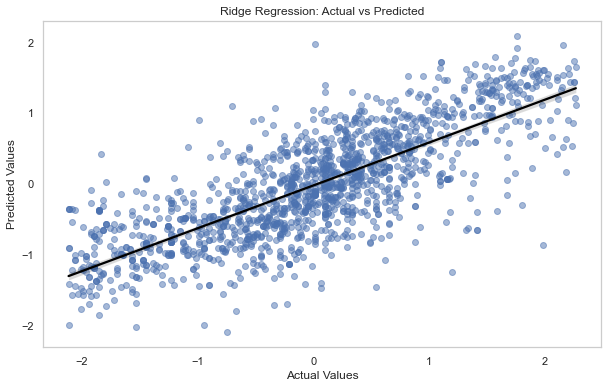

In [153]:
#relationship between the actual values and the predicted values 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=ridge_predictions, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.grid(False)
plt.show()

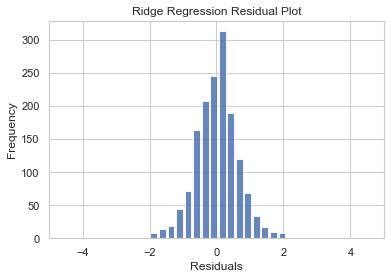

In [154]:
residuals_ridge = y_test - ridge_predictions

# Plot histogram of residuals
plt.hist(residuals_ridge, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-5, 5])
plt.title('Ridge Regression Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

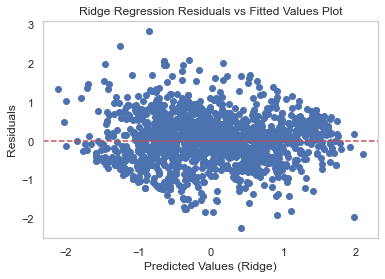

In [155]:
# Plot residuals against predicted values
plt.scatter(ridge_predictions, residuals_ridge)
plt.xlabel('Predicted Values (Ridge)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('Ridge Regression Residuals vs Fitted Values Plot')
plt.grid(False)
plt.show()

## Lasso Regression

In [156]:
from sklearn.linear_model import LassoCV

# Create LassoCV model with optional cv argument for specifying number of folds
lasso_cv_model = LassoCV(cv=5)

# Fit the LassoCV model 
lasso_cv_model.fit(X_train, y_train)

# The `alpha_` attribute will contain the best alpha value found
best_alpha = lasso_cv_model.alpha_
print("Best alpha:", best_alpha)

# Use the trained Lasso model to make predictions on the test data
lasso_predictions = lasso_cv_model.predict(X_test)


Best alpha: 0.00029775725352714345


In [157]:
print("\nLasso Coefficients:")
for i, coef in enumerate(lasso_cv_model.coef_):
    print(f"Coefficient {i+1}: {coef}")


Lasso Coefficients:
Coefficient 1: -0.0
Coefficient 2: 0.0
Coefficient 3: 0.6594315524552691
Coefficient 4: -0.0
Coefficient 5: -0.0
Coefficient 6: -0.2640310233538414
Coefficient 7: -0.0
Coefficient 8: 0.22938928834600586
Coefficient 9: -0.7233030299321376
Coefficient 10: 0.0
Coefficient 11: -0.05744862074165566
Coefficient 12: -0.0
Coefficient 13: 0.035902460888031465
Coefficient 14: -0.09713855924231733
Coefficient 15: 0.1514421029552979
Coefficient 16: 0.11641927172185017
Coefficient 17: -0.0
Coefficient 18: 0.0
Coefficient 19: 0.5554809734080679
Coefficient 20: -0.2685090222487819
Coefficient 21: 0.1640448046913798
Coefficient 22: 0.577359250376541
Coefficient 23: -0.0
Coefficient 24: 0.26299586817902737
Coefficient 25: -0.3318608955549884
Coefficient 26: 0.7075719261669575
Coefficient 27: 0.20132952585299735
Coefficient 28: 0.001701060573524243
Coefficient 29: -0.0
Coefficient 30: -0.29328860247415484
Coefficient 31: 0.0
Coefficient 32: -0.0
Coefficient 33: -0.0
Coefficient 34: 

In [158]:
# Viewing the intercept in the model equation
print(f"Lasso Intercept: {lasso_cv_model.intercept_}")

Lasso Intercept: 0.1432437986950008


In [159]:
# Evaluating the models
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

lasso_mse = mean_squared_error(y_test, lasso_predictions)
print(f"Lasso Mean Squared Error: {lasso_mse:.2f}")
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
print(f"Lasso Mean Absolute Error: {lasso_mae:.2f}")
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
print(f"Lasso Root Mean Squared Error: {lasso_rmse:.2f}")
lasso_r2 = lasso_cv_model.score(X_test, y_test)
print(f"Lasso R-squared: {lasso_r2:.2f}")

Lasso Mean Squared Error: 0.40
Lasso Mean Absolute Error: 0.49
Lasso Root Mean Squared Error: 0.63
Lasso R-squared: 0.60


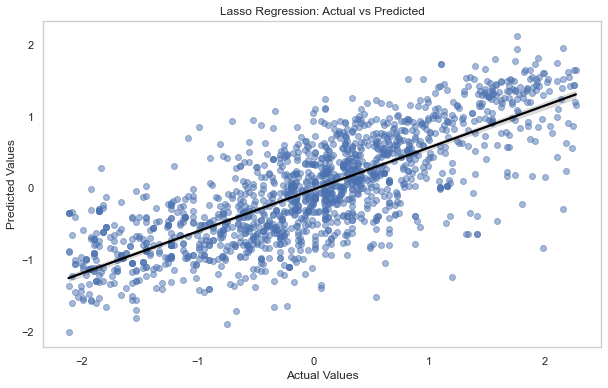

In [160]:
#relationship between the actual values and the predicted values 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=lasso_predictions, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs Predicted')
plt.grid(False)
plt.show()

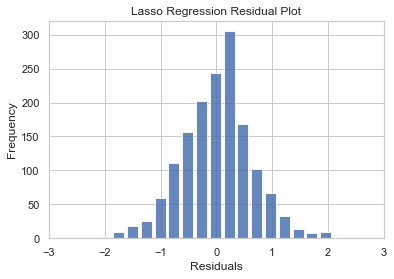

In [161]:
residuals_lasso = y_test - lasso_predictions

# Plot histogram of residuals
plt.hist(residuals_lasso, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-3, 3])
plt.title('Lasso Regression Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

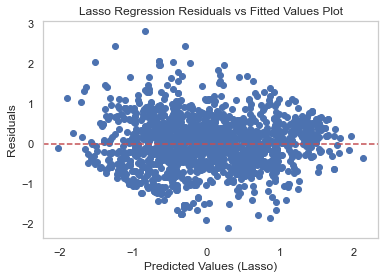

In [162]:
# Plot residuals against predicted values
plt.scatter(lasso_predictions, residuals_lasso)
plt.xlabel('Predicted Values (Lasso)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('Lasso Regression Residuals vs Fitted Values Plot')
plt.grid(False)
plt.show()

## Random Forest Regressor

In [163]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(random_state=4)
rfrmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=4)

In [164]:
#Viewing the default parameters
rfrmodel.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 4,
 'verbose': 0,
 'warm_start': False}

In [165]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_predrfr = rfrmodel.predict(X_test)

print("Random Forest Regressor Mean Squared Error: {}".format(mean_squared_error(y_test, y_predrfr)))
print("Random Forest Regressor Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_predrfr)))
print("Random Forest Regressor Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_predrfr))))
print("Random Forest Regressor R squared: {}".format(r2_score(y_test, y_predrfr)))


Random Forest Regressor Mean Squared Error: 0.18219155989380387
Random Forest Regressor Mean Absolute Error: 0.2711820202479274
Random Forest Regressor Root Mean Squared Error: 0.4268390327673933
Random Forest Regressor R squared: 0.8165890397547192


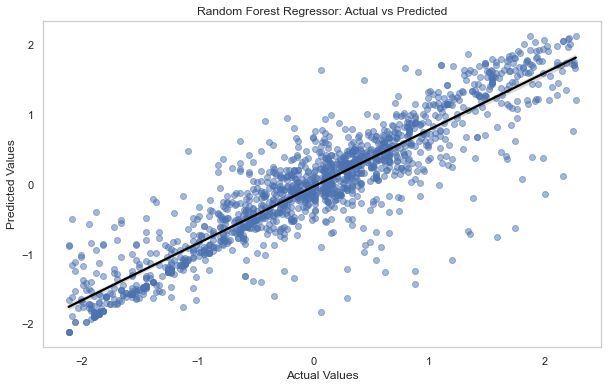

In [166]:
#relationship between the actual values and the predicted values 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_predrfr, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.grid(False)
plt.show()

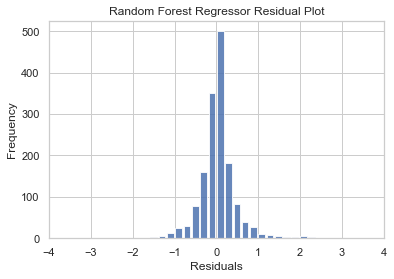

In [167]:
residuals_rfr = y_test - y_predrfr

# Plot histogram of residuals
plt.hist(residuals_rfr, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-4, 4])
plt.title('Random Forest Regressor Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

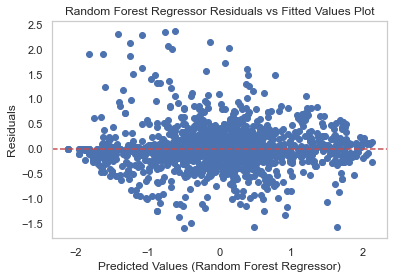

In [168]:
# Plot residuals against predicted values
plt.scatter(y_predrfr, residuals_rfr)
plt.xlabel('Predicted Values (Random Forest Regressor)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('Random Forest Regressor Residuals vs Fitted Values Plot')
plt.grid(False)
plt.show()

## Decision Tree Regressor

In [169]:
from sklearn.tree import DecisionTreeRegressor
dtrmodel = DecisionTreeRegressor(random_state=4)

In [170]:
#getting the default parameters
dtrmodel.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 4,
 'splitter': 'best'}

In [171]:
#Fitting the DecisionTreeRegressor model
dtrmodel.fit(X_train,y_train)

DecisionTreeRegressor(random_state=4)

In [172]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_preddtr = dtrmodel.predict(X_test)

print("Decision Tree Regressor Mean Squared Error: {}".format(mean_squared_error(y_test, y_preddtr)))
print("Decision Tree Regressor Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_preddtr))))
print("Decision Tree Regressor Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_preddtr))) 
print("Decision Tree R squared: {}".format(dtrmodel.score(X_test, y_test)))

Decision Tree Regressor Mean Squared Error: 0.34877624639102595
Decision Tree Regressor Root Mean Squared Error: 0.5905728120994277
Decision Tree Regressor Mean Absolute Error: 0.34583930141156555
Decision Tree R squared: 0.6488894090450221


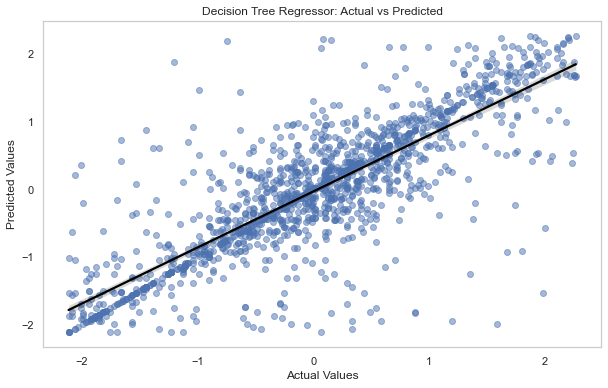

In [173]:
#relationship between the actual values and the predicted values 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_preddtr, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.grid(False)
plt.show()

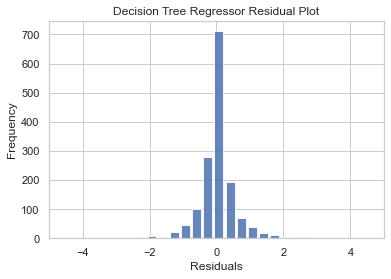

In [174]:
residuals_dtr = y_test - y_preddtr

# Plot histogram of residuals
plt.hist(residuals_dtr, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-5, 5])
plt.title('Decision Tree Regressor Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

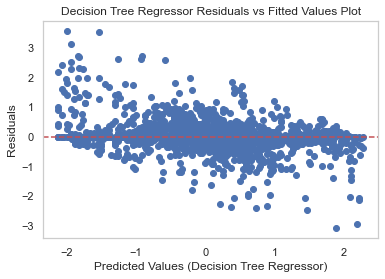

In [175]:
# Plot residuals against predicted values
plt.scatter(y_preddtr, residuals_dtr)
plt.xlabel('Predicted Values (Decision Tree Regressor)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('Decision Tree Regressor Residuals vs Fitted Values Plot')
plt.grid(False)
plt.show()

## KNN Regression

In [176]:
from sklearn.neighbors import KNeighborsRegressor
knnmodel = KNeighborsRegressor(n_neighbors=3)

In [177]:
knnmodel.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [178]:
knnmodel.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [179]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_predknn = knnmodel.predict(X_test)

print("KNN Regression Mean Squared Error: {}".format(mean_squared_error(y_test, y_predknn)))
print("KNN Regression Root Mean Squared Error: {}".format(np.sqrt(mean_squared_error(y_test, y_predknn))))
print("KNN Regression Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_predknn))) 
print("KNN Regression R squared: {}".format(knnmodel.score(X_test, y_test)))


KNN Regression Mean Squared Error: 0.26423737933674724
KNN Regression Root Mean Squared Error: 0.5140402506971096
KNN Regression Mean Absolute Error: 0.31873925500469075
KNN Regression R squared: 0.7339940911362847


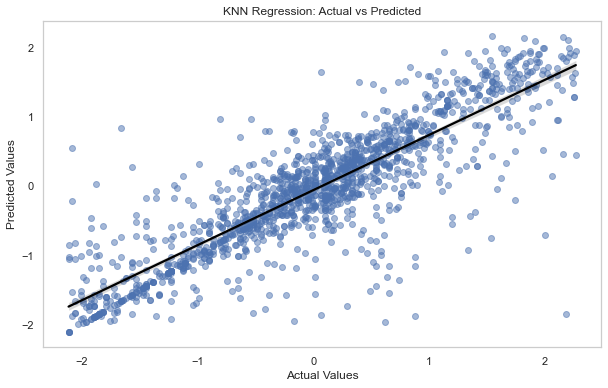

In [180]:
#relationship between the actual values and the predicted values 
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_predknn, scatter_kws={'alpha': 0.5}, line_kws={'color': 'black'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN Regression: Actual vs Predicted')
plt.grid(False)
plt.show()

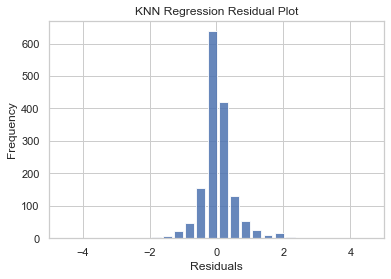

In [181]:
residuals_knn = y_test - y_predknn

# Plot histogram of residuals
plt.hist(residuals_knn, bins=20, alpha=0.85, rwidth=0.8)
plt.xlim([-5, 5])
plt.title('KNN Regression Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

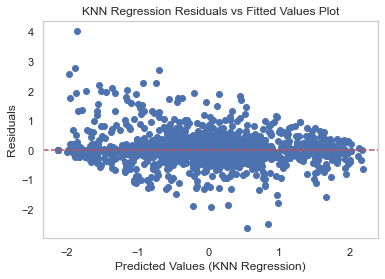

In [182]:
# Plot residuals against predicted values
plt.scatter(y_predknn, residuals_knn)
plt.xlabel('Predicted Values (KNN Regression)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--') 
plt.title('KNN Regression Residuals vs Fitted Values Plot')
plt.grid(False)
plt.show()

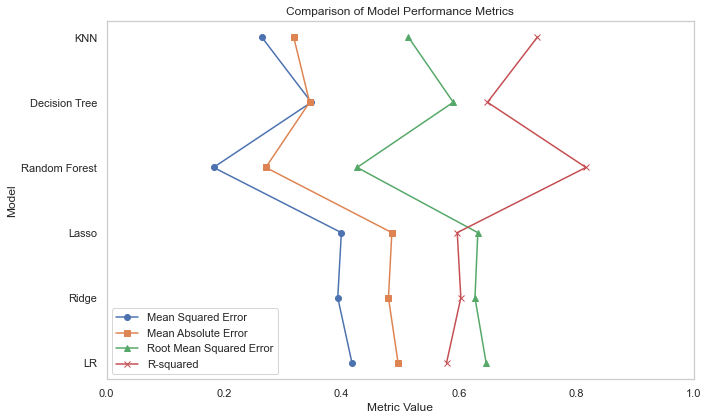

In [183]:
import matplotlib.pyplot as plt

# Define model names and corresponding metric values
models = ['LR', 'Ridge', 'Lasso', 'Random Forest', 'Decision Tree', 'KNN']
mse_values = [mean_squared_error(y_test, y_pred),
              ridge_mse,
              lasso_mse,
              mean_squared_error(y_test, y_predrfr),
              mean_squared_error(y_test, y_preddtr),
              mean_squared_error(y_test, y_predknn)]
mae_values = [mean_absolute_error(y_test, y_pred),
              ridge_mae,
              lasso_mae,
              mean_absolute_error(y_test, y_predrfr),
              mean_absolute_error(y_test, y_preddtr),
              mean_absolute_error(y_test, y_predknn)]
rmse_values = [np.sqrt(mean_squared_error(y_test, y_pred)),
               ridge_rmse,
               lasso_rmse,
               np.sqrt(mean_squared_error(y_test, y_predrfr)),
               np.sqrt(mean_squared_error(y_test, y_preddtr)),
               np.sqrt(mean_squared_error(y_test, y_predknn))]
r2_values = [r2_score(y_test, y_pred),
             ridge_r2,
             lasso_r2,
             r2_score(y_test, y_predrfr),
             dtrmodel.score(X_test, y_test),
             knnmodel.score(X_test, y_test)]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(mse_values, models, label='Mean Squared Error', marker='o')
plt.plot(mae_values, models, label='Mean Absolute Error', marker='s')
plt.plot(rmse_values, models, label='Root Mean Squared Error', marker='^')
plt.plot(r2_values, models, label='R-squared', marker='x')

plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Metric Value')
plt.ylabel('Model')
plt.legend()
plt.xlim(0, 1)
plt.grid(False)
plt.tight_layout()

plt.show()


# Classification

#### Classsification dataset source link: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [184]:
import warnings
warnings.filterwarnings("ignore")

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [186]:
#Uploading the dataset

In [187]:
datasettest = pd.read_csv(r"D:\ML cw\Airline Passenger Satisfaction - Classification\testdataclassification.csv")
datasettrain = pd.read_csv(r"D:\ML cw\Airline Passenger Satisfaction - Classification\traindataclassification.csv")

In [188]:
#merging the data sets for EDA purposes

In [189]:
dfclassification = pd.concat([datasettest, datasettrain], ignore_index=True)
dfclassification.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [190]:
#explore the datasets

In [191]:
datasettest.shape

(25976, 25)

In [192]:
datasettrain.shape

(103904, 25)

In [193]:
dfclassification.shape

(129880, 25)

In [194]:
#Data Cleaning

In [195]:
#dropping duplicated rows

In [196]:
dfclassification.drop_duplicates(inplace=True)

In [197]:
dfclassification.shape

(129880, 25)

In [198]:
#Since the number of rows and columns do not change, there were no duplicates in the dataset

In [199]:
#removing columns 'id' and 'Unnamed: 0'

In [200]:
dfclassification.drop(['id', 'Unnamed: 0'], axis=1, inplace=True)

In [201]:
dfclassification.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [202]:
#checking null values

In [203]:
pd.isnull(dfclassification).sum(axis=0)

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [204]:
#dropping null values

In [205]:
dfclassification = dfclassification.dropna()

In [206]:
#rechecking null values

In [207]:
pd.isnull(dfclassification).sum(axis=0)

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [208]:
dfclassification.shape

(129487, 23)

In [209]:
#removing '0' under ratings in categorical variables as '0' shows not applicable.

In [210]:
dfclassification = dfclassification[dfclassification["Inflight wifi service"] > 0]
dfclassification = dfclassification[dfclassification["Departure/Arrival time convenient"] > 0]
dfclassification = dfclassification[dfclassification["Gate location"] > 0]
dfclassification = dfclassification[dfclassification["Inflight wifi service"] > 0]
dfclassification = dfclassification[dfclassification["Food and drink"] > 0]
dfclassification = dfclassification[dfclassification["Online boarding"] > 0]
dfclassification = dfclassification[dfclassification["Seat comfort"] > 0]
dfclassification = dfclassification[dfclassification["Inflight entertainment"] > 0]
dfclassification = dfclassification[dfclassification["On-board service"] > 0]
dfclassification = dfclassification[dfclassification["Leg room service"] > 0]
dfclassification = dfclassification[dfclassification["Checkin service"] > 0]
dfclassification = dfclassification[dfclassification["Inflight service"] > 0]
dfclassification = dfclassification[dfclassification["Cleanliness"] > 0]

In [211]:
#checking for null values, data types

In [212]:
dfclassification.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119205 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             119205 non-null  object 
 1   Customer Type                      119205 non-null  object 
 2   Age                                119205 non-null  int64  
 3   Type of Travel                     119205 non-null  object 
 4   Class                              119205 non-null  object 
 5   Flight Distance                    119205 non-null  int64  
 6   Inflight wifi service              119205 non-null  int64  
 7   Departure/Arrival time convenient  119205 non-null  int64  
 8   Ease of Online booking             119205 non-null  int64  
 9   Gate location                      119205 non-null  int64  
 10  Food and drink                     119205 non-null  int64  
 11  Online boarding                    1192

In [213]:
#The descriptive statistics of the columns of the dataset

In [214]:
dfclassification.describe() 

Age  Flight Distance  Inflight wifi service  \
count  119205.000000    119205.000000          119205.000000   
mean       39.858076      1223.813775               2.817734   
std        15.028874       999.865101               1.253353   
min         7.000000        31.000000               1.000000   
25%        28.000000       440.000000               2.000000   
50%        40.000000       867.000000               3.000000   
75%        51.000000      1775.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      119205.000000           119205.000000   
mean                            3.206661                2.879007   
std                             1.386894                1.298687   
min                             1.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  119205.000000   119205.000000    119205.000000  119205.000000   
mean        2.987056        3.213800         3.330582       3.456566   
std         1.282041        1.324448         1.263090       1.311608   
min         1.000000        1.000000         1.000000       1.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         4.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           119205.000000     119205.000000     119205.000000   
mean                 3.380513          3.386360          3.380588   
std                  1.327258          1.285389          1.295464   
min                  1.000000          1.000000          1.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     119205.000000    119205.000000     119205.000000  119205.000000   
mean           3.637113         3.294669          3.646550       3.294015   
std            1.167918         1.266247          1.165729       1.310350   
min            1.000000         1.000000          1.000000       1.000000   
25%            3.000000         2.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               119205.000000             119205.000000  
mean                    14.837507                 15.284233  
std                     38.165634                 38.687249  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     13.000000                 13.000000  
max                   1592.000000               1584.000000

### Minimum values of all the column variables are more than or equal to zero and since these variables cannot take negative values by definition, the minimum values are valid.

## Exploratory Data Analysis

In [215]:
satisfaction_counts = dfclassification['satisfaction'].value_counts()

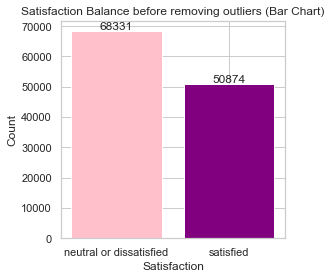

In [216]:
plt.figure(figsize=(4, 4))
bars = plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=['pink', 'purple'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Satisfaction Balance before removing outliers (Bar Chart)')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

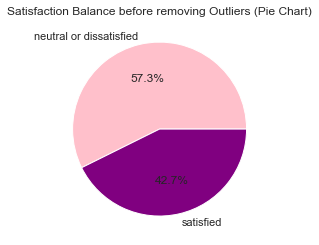

In [217]:
#Creating pie chart to see dataset balance of predictor variables
plt.figure(figsize=(4, 4))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=['pink', 'purple'])
plt.title('Satisfaction Balance before removing Outliers (Pie Chart)')
plt.show()

In [218]:
#Removing any presence of outliers in numerical predictor variables

In [219]:
q1 = dfclassification.quantile(0.25)
q3 = dfclassification.quantile(0.75)
iqr = q3 - q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

dfclassification = dfclassification[(dfclassification["Age"] < ul["Age"]) & (dfclassification["Age"] > ll["Age"])]
dfclassification = dfclassification[(dfclassification["Flight Distance"] < ul["Flight Distance"]) & (dfclassification["Flight Distance"] > ll["Flight Distance"])]
dfclassification = dfclassification[(dfclassification["Departure Delay in Minutes"] < ul["Departure Delay in Minutes"]) & (dfclassification["Departure Delay in Minutes"] > ll["Departure Delay in Minutes"])]
dfclassification = dfclassification[(dfclassification["Arrival Delay in Minutes"] < ul["Arrival Delay in Minutes"]) & (dfclassification["Arrival Delay in Minutes"] > ll["Arrival Delay in Minutes"])]

In [220]:
dfclassification.shape

(98614, 23)

In [221]:
#The number of rows has reduced from 119568 to 98597 after removing outliers

In [222]:
dfclassification.describe()

Age  Flight Distance  Inflight wifi service  \
count  98614.000000     98614.000000           98614.000000   
mean      39.861723      1173.900227               2.833634   
std       15.070773       936.382862               1.257884   
min        7.000000        31.000000               1.000000   
25%       28.000000       431.000000               2.000000   
50%       40.000000       861.000000               3.000000   
75%       51.000000      1732.000000               4.000000   
max       85.000000      3777.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       98614.000000            98614.000000   
mean                            3.215162                2.883789   
std                             1.386459                1.298206   
min                             1.000000                1.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   98614.000000    98614.000000     98614.000000  98614.000000   
mean        2.983075        3.226175         3.341270      3.466374   
std         1.281414        1.325551         1.260004      1.311502   
min         1.000000        1.000000         1.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         4.000000      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            98614.000000      98614.000000      98614.000000   
mean                 3.392125          3.400542          3.378547   
std                  1.327899          1.282819          1.298770   
min                  1.000000          1.000000          1.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      98614.000000     98614.000000      98614.000000  98614.000000   
mean           3.642748         3.306326          3.667562      3.302959   
std            1.171224         1.263907          1.161402      1.310228   
min            1.000000         1.000000          1.000000      1.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                98614.000000              98614.000000  
mean                     3.688320                  3.707040  
std                      7.121307                  6.987846  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                      4.000000                  4.000000  
max                     32.000000                 32.000000

#### Univariate Analysis

In [223]:
#changing data type to category

In [224]:
new = ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age']
categorical_columns = [x for x in dfclassification.columns.to_list() if x not in new]
for i in categorical_columns:
    dfclassification[i] = dfclassification[i].astype('category')

In [225]:
dfclassification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98614 entries, 1 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             98614 non-null  category
 1   Customer Type                      98614 non-null  category
 2   Age                                98614 non-null  int64   
 3   Type of Travel                     98614 non-null  category
 4   Class                              98614 non-null  category
 5   Flight Distance                    98614 non-null  int64   
 6   Inflight wifi service              98614 non-null  category
 7   Departure/Arrival time convenient  98614 non-null  category
 8   Ease of Online booking             98614 non-null  category
 9   Gate location                      98614 non-null  category
 10  Food and drink                     98614 non-null  category
 11  Online boarding                    98614

In [226]:
dfclassification.describe()

Age  Flight Distance  Departure Delay in Minutes  \
count  98614.000000     98614.000000                98614.000000   
mean      39.861723      1173.900227                    3.688320   
std       15.070773       936.382862                    7.121307   
min        7.000000        31.000000                    0.000000   
25%       28.000000       431.000000                    0.000000   
50%       40.000000       861.000000                    0.000000   
75%       51.000000      1732.000000                    4.000000   
max       85.000000      3777.000000                   32.000000   

       Arrival Delay in Minutes  
count              98614.000000  
mean                   3.707040  
std                    6.987846  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    4.000000  
max                   32.000000

In [227]:
dfclassification.describe(include='category')

Gender   Customer Type   Type of Travel     Class  \
count    98614           98614            98614     98614   
unique       2               2                2         3   
top     Female  Loyal Customer  Business travel  Business   
freq     49978           82644            67520     47448   

        Inflight wifi service  Departure/Arrival time convenient  \
count                   98614                              98614   
unique                      5                                  5   
top                         2                                  4   
freq                    25308                              25427   

        Ease of Online booking  Gate location  Food and drink  \
count                    98614          98614           98614   
unique                       5              5               5   
top                          3              3               4   
freq                     24179          26979           23641   

        Online boarding  Seat comfort  Inflight entertainment  \
count             98614         98614                   98614   
unique                5             5                       5   
top                   4             4                       4   
freq              30211         30803                   28759   

        On-board service  Leg room service  Baggage handling  Checkin service  \
count              98614             98614             98614            98614   
unique                 5                 5                 5                5   
top                    4                 4                 4                4   
freq               30014             27548             35866            27699   

        Inflight service  Cleanliness             satisfaction  
count              98614        98614                    98614  
unique                 5            5                        2  
top                    4            4  neutral or dissatisfied  
freq               36533        26122                    55780

In [228]:
for col in dfclassification.columns:
    print(f'{col}: {dfclassification[col].nunique()}  {dfclassification[col].unique()}\n')

Gender: 2  ['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Customer Type: 2  ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']

Age: 75  [36 49 16 47 46 33 52 31 43 55 25 30 62 24 22 44 51 56 41 53 39 32 40 42
 28 60 59 58 27 67 70 66 19 69 35 54 26 61 50 21 37 45 38  7 20 34 17 15
 48 13 11  8 23 65 80 57  9 64 29 12 68 18 10 14 79 63 73 71 72 77 76 78
 74 85 75]

Type of Travel: 2  ['Business travel', 'Personal Travel']
Categories (2, object): ['Business travel', 'Personal Travel']

Class: 3  ['Business', 'Eco', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

Flight Distance: 3568  [2863 1182  311 ...  974 1479  400]

Inflight wifi service: 5  [1, 2, 3, 5, 4]
Categories (5, int64): [1, 2, 3, 4, 5]

Departure/Arrival time convenient: 5  [1, 3, 2, 5, 4]
Categories (5, int64): [1, 2, 3, 4, 5]

Ease of Online booking: 5  [3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]

Gate location: 5  [1, 3

In [229]:
#checking the counts of variables

In [230]:
len(categorical_columns)

19

In [231]:
sns.set(style="darkgrid")

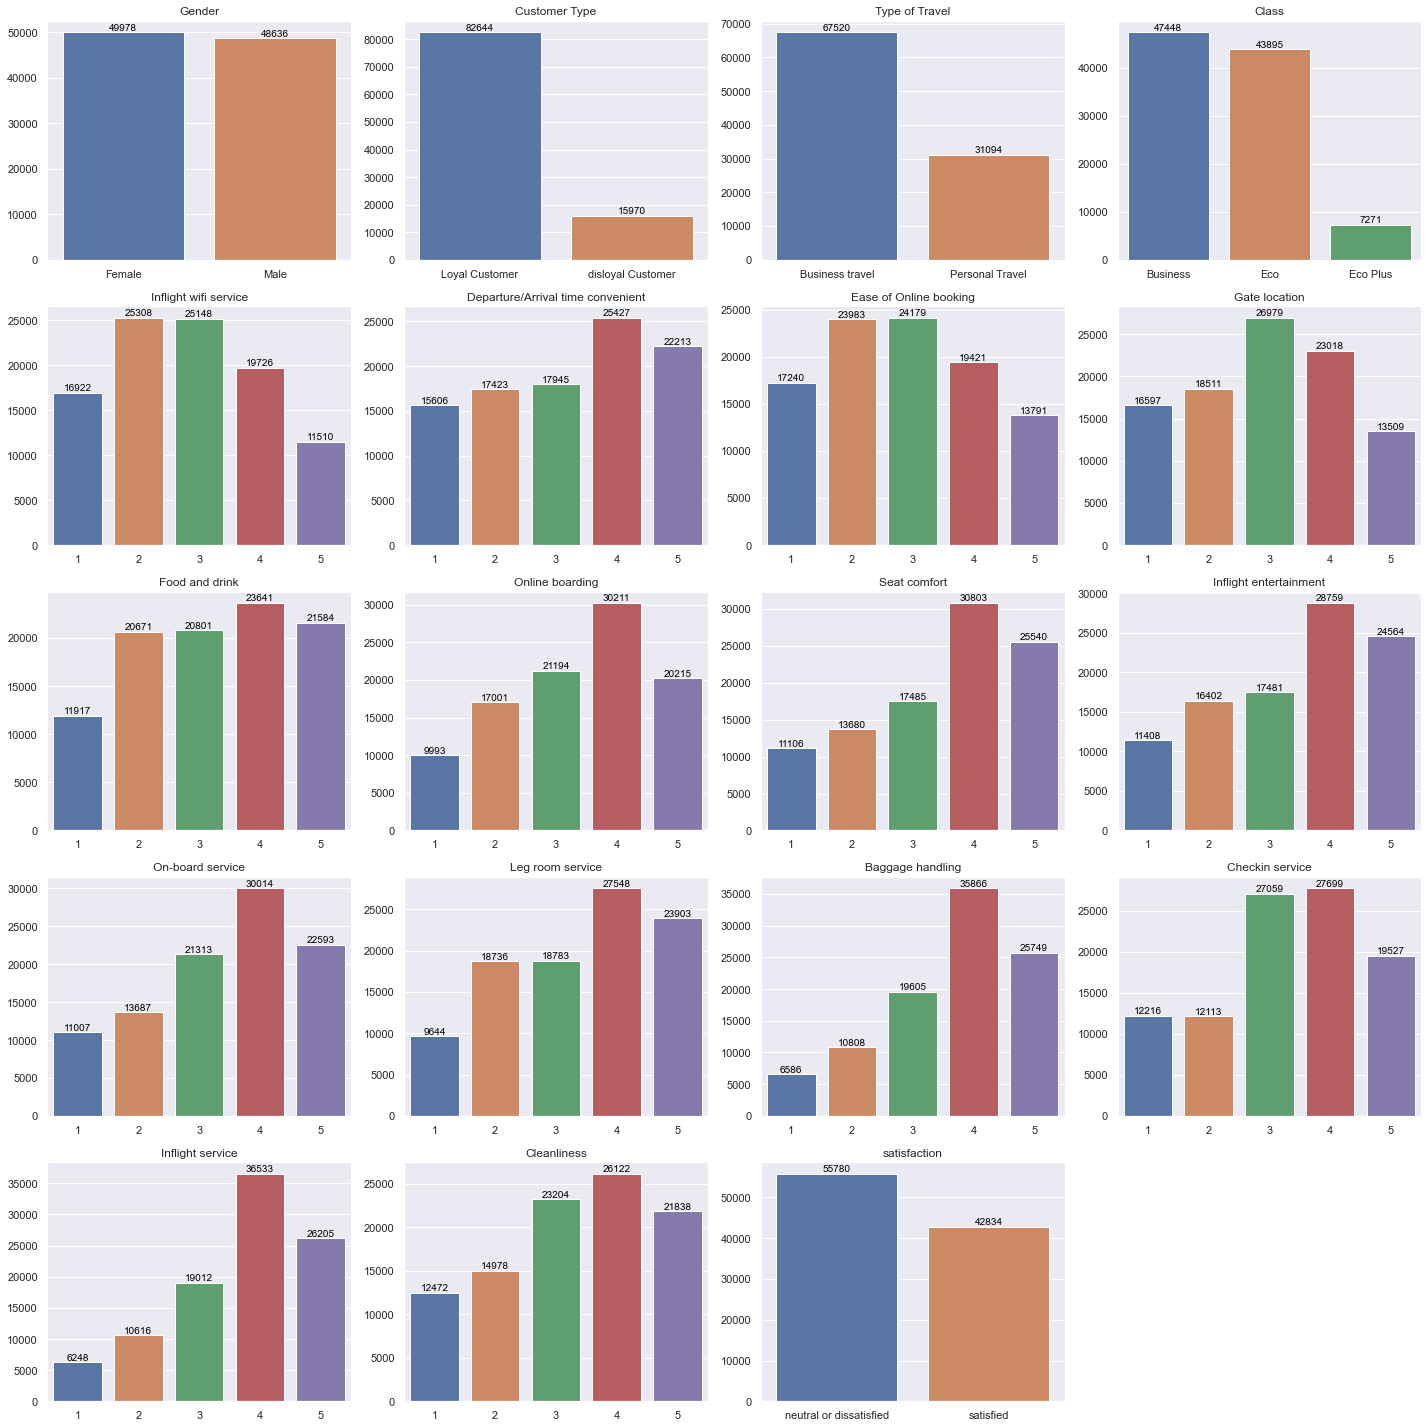

In [232]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(20,20))
ax = ax.flatten()
for i in range(len(categorical_columns)):
    sns.countplot(x = dfclassification[categorical_columns[i]], ax=ax[i])
    ax[i].set_title(categorical_columns[i])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    for p in ax[i].patches:
        ax[i].text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                fontsize=10, color='black', ha='center', va='bottom')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

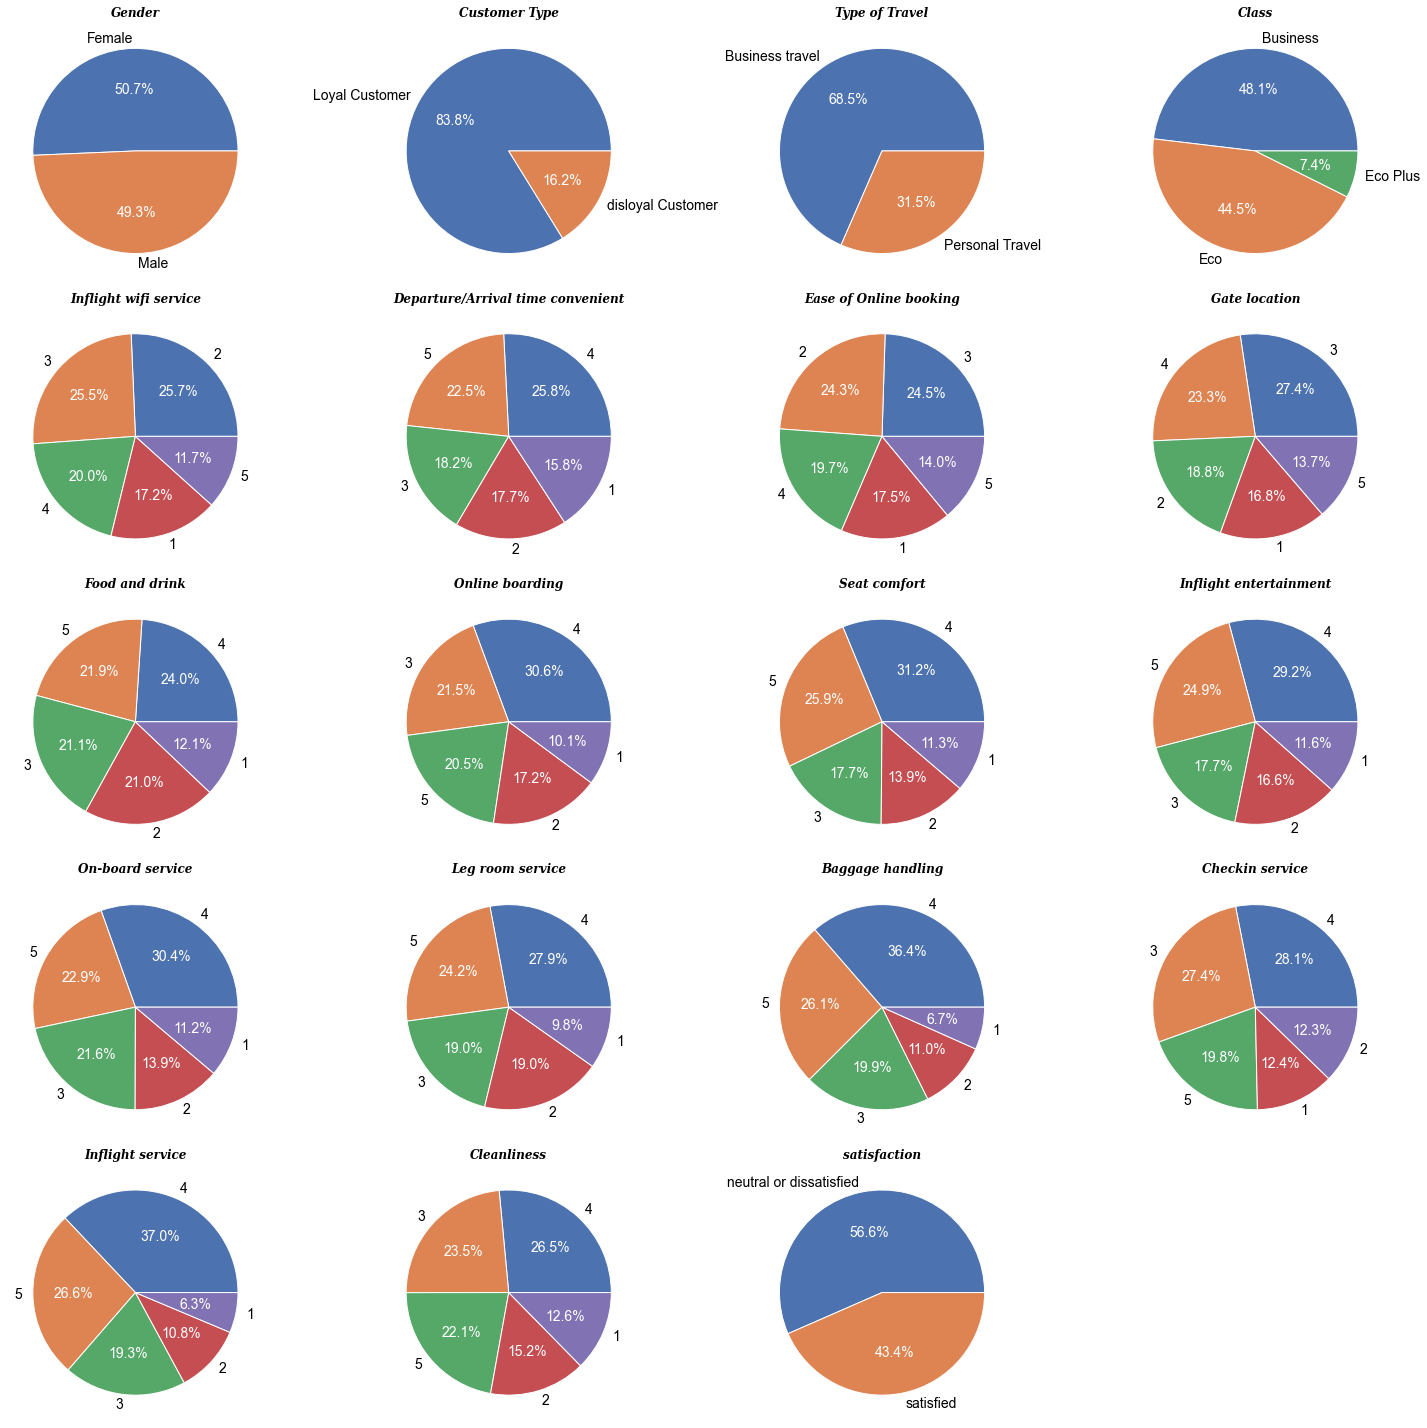

In [233]:
fig, ax = plt.subplots((len(categorical_columns)+1)//4, 4, figsize=(20,20))
ax = ax.flatten()
for i in range(len(categorical_columns)):
    _, _, autotexts = ax[i].pie(dfclassification[categorical_columns[i]].value_counts(), 
              labels=dfclassification[categorical_columns[i]].value_counts().index,
              textprops={'fontsize': 14, 'color': 'black'}, 
              autopct='%1.1f%%'
              )
    for autotext in autotexts:
        autotext.set_color('white')
    ax[i].set_title(categorical_columns[i], fontsize=12,
                    fontweight='bold', fontstyle='italic',
                    fontfamily='serif', color='black')
for i in range(len(categorical_columns), len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

In [234]:
#Replace values 0 as "neutral or dissatisifed" and 1 as satisfied in the "satisfaction" column

In [235]:
dfclassification['satisfaction'] = dfclassification['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1})

In [236]:
dfclassification.shape

(98614, 23)

In [237]:
#Standardising numerical variables for comparison purposes

In [238]:
from sklearn.preprocessing import StandardScaler
dfclassificationnum=dfclassification[['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age','satisfaction']]
scaler = StandardScaler()
num_cols = ['Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Flight Distance', 'Age']
dfclassificationnum[num_cols] = scaler.fit_transform(dfclassification[num_cols])
dfclassificationnum.head()

Arrival Delay in Minutes  Departure Delay in Minutes  Flight Distance  \
1                 -0.530501                   -0.517930         1.803865   
4                  2.331626                   -0.517930         0.008650   
5                 -0.530501                   -0.517930        -0.921530   
8                 -0.530501                   -0.377506        -0.659883   
9                  1.472988                    3.413952         0.608835   

        Age satisfaction  
1 -0.256241            1  
4  0.606361            1  
5 -1.583319            1  
8  0.473653            1  
9  0.407299            1

In [239]:
dfclassificationnum.shape

(98614, 5)

In [240]:
len(new)

4

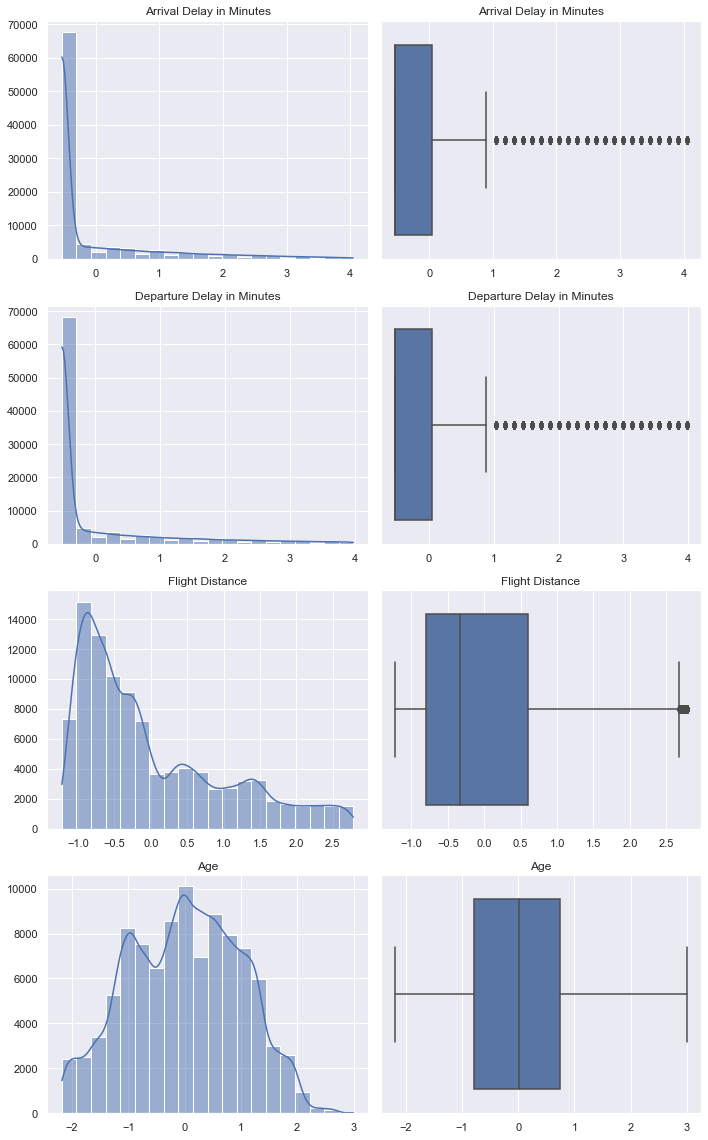

In [241]:
figure, axes = plt.subplots(len(new), 2, figsize=(10,4*len(new)))
axes = axes.flatten()
for i in range(len(new)):
    sns.histplot(dfclassificationnum[new[i]], kde=True, ax=axes[i*2], bins=20)
    sns.boxplot(dfclassificationnum[new[i]], ax=axes[i*2+1])
    axes[i*2].set_title(new[i])
    axes[i*2+1].set_title(new[i])
    axes[i*2].set_xlabel('')
    axes[i*2+1].set_xlabel('')
    axes[i*2].set_ylabel('')
    axes[i*2+1].set_ylabel('')
plt.tight_layout()
plt.show()

### Data Featuring- Boxcox transformation

In [242]:
# Extracting variables from dfclassificationnum
original_age_data = dfclassificationnum['Age']
original_flight_distance_data = dfclassificationnum['Flight Distance']
original_departure_delay_data = dfclassificationnum['Departure Delay in Minutes']
original_arrival_delay_data = dfclassificationnum['Arrival Delay in Minutes']

In [243]:
# Adding a constant to make the data positive
constant = 4
age_data_positive = original_age_data + constant
flight_distance_data_positive = original_flight_distance_data + constant
departure_delay_data_positive = original_departure_delay_data + constant
arrival_delay_data_positive = original_arrival_delay_data + constant

In [244]:
# Applying Box-Cox transformation to each variable and saving lambda values
from scipy import stats
transformed_age_data, lambda_age = stats.boxcox(age_data_positive)
transformed_flight_distance_data, lambda_flight_distance = stats.boxcox(flight_distance_data_positive)
transformed_departure_delay_data, lambda_departure_delay = stats.boxcox(departure_delay_data_positive)
transformed_arrival_delay_data, lambda_arrival_delay = stats.boxcox(arrival_delay_data_positive)

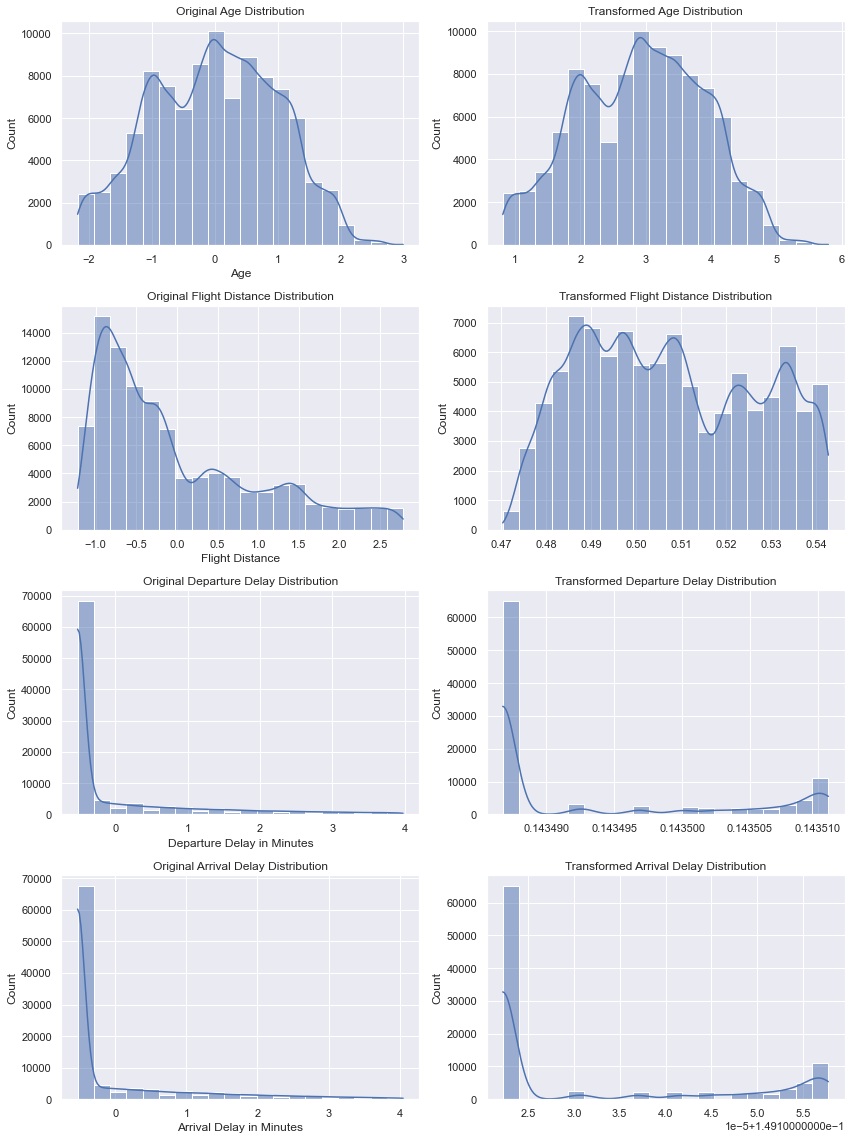

Lambda value for Age: 0.973010045560749
Lambda value for Flight Distance: -1.7819775681423347
Lambda value for Departure Delay: -6.968114298215201
Lambda value for Arrival Delay: -6.704306079327478


In [245]:
# Plotting the original and transformed distributions
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Plotting the original distributions
sns.histplot(original_age_data, kde=True, bins=20, ax=axes[0, 0])
sns.histplot(original_flight_distance_data, kde=True, bins=20, ax=axes[1, 0])
sns.histplot(original_departure_delay_data, kde=True, bins=20, ax=axes[2, 0])
sns.histplot(original_arrival_delay_data, kde=True, bins=20, ax=axes[3, 0])

# Plotting the transformed distributions
sns.histplot(transformed_age_data, kde=True, bins=20, ax=axes[0, 1])
sns.histplot(transformed_flight_distance_data, kde=True, bins=20, ax=axes[1, 1])
sns.histplot(transformed_departure_delay_data, kde=True, bins=20, ax=axes[2, 1])
sns.histplot(transformed_arrival_delay_data, kde=True, bins=20, ax=axes[3, 1])

# Adding titles and labels
axes[0, 0].set_title('Original Age Distribution')
axes[0, 1].set_title('Transformed Age Distribution')
axes[1, 0].set_title('Original Flight Distance Distribution')
axes[1, 1].set_title('Transformed Flight Distance Distribution')
axes[2, 0].set_title('Original Departure Delay Distribution')
axes[2, 1].set_title('Transformed Departure Delay Distribution')
axes[3, 0].set_title('Original Arrival Delay Distribution')
axes[3, 1].set_title('Transformed Arrival Delay Distribution')
plt.tight_layout()
plt.show()

# Print lambda values
print(f"Lambda value for Age: {lambda_age}")
print(f"Lambda value for Flight Distance: {lambda_flight_distance}")
print(f"Lambda value for Departure Delay: {lambda_departure_delay}")
print(f"Lambda value for Arrival Delay: {lambda_arrival_delay}")


In [246]:
# Replace the original values with the transformed values in the DataFrame
dfclassificationnum['Age'] = transformed_age_data
dfclassificationnum['Flight Distance'] = transformed_flight_distance_data
dfclassificationnum['Departure Delay in Minutes'] = transformed_departure_delay_data
dfclassificationnum['Arrival Delay in Minutes'] = transformed_arrival_delay_data

# Print the updated DataFrame
dfclassificationnum

Arrival Delay in Minutes  Departure Delay in Minutes  Flight Distance  \
1                       0.149122                    0.143487         0.536730   
4                       0.149157                    0.143487         0.513906   
5                       0.149122                    0.143487         0.485509   
8                       0.149122                    0.143493         0.495746   
9                       0.149156                    0.143511         0.524311   
...                          ...                         ...              ...   
129875                  0.149122                    0.143500         0.479606   
129876                  0.149122                    0.143487         0.531975   
129877                  0.149156                    0.143507         0.527844   
129878                  0.149122                    0.143487         0.509529   
129879                  0.149122                    0.143487         0.523989   

             Age satisfaction  
1       2.685194            1  
4       3.515197            1  
5       1.397525            1  
8       3.387799            1  
9       3.324062            1  
...          ...          ...  
129875  1.849965            0  
129876  3.515197            1  
129877  2.300433            0  
129878  1.785459            0  
129879  2.107597            0  

[98614 rows x 5 columns]

### Bivariate Analysis

In [247]:
# Convert specified columns to object data type
dfclassification['Gender'] = dfclassification['Gender'].astype('object')
dfclassification['Customer Type'] = dfclassification['Customer Type'].astype('object')
dfclassification['Type of Travel'] = dfclassification['Type of Travel'].astype('object')
dfclassification['Class'] = dfclassification['Class'].astype('object')

In [248]:
dfclassification.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98614 entries, 1 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Gender                             98614 non-null  object  
 1   Customer Type                      98614 non-null  object  
 2   Age                                98614 non-null  int64   
 3   Type of Travel                     98614 non-null  object  
 4   Class                              98614 non-null  object  
 5   Flight Distance                    98614 non-null  int64   
 6   Inflight wifi service              98614 non-null  category
 7   Departure/Arrival time convenient  98614 non-null  category
 8   Ease of Online booking             98614 non-null  category
 9   Gate location                      98614 non-null  category
 10  Food and drink                     98614 non-null  category
 11  Online boarding                    98614

In [249]:
# Create a new DataFrame without object data type columns
dfclassification_numeric = dfclassification.select_dtypes(exclude=['object'])


In [250]:
dfclassification_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98614 entries, 1 to 129879
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Age                                98614 non-null  int64   
 1   Flight Distance                    98614 non-null  int64   
 2   Inflight wifi service              98614 non-null  category
 3   Departure/Arrival time convenient  98614 non-null  category
 4   Ease of Online booking             98614 non-null  category
 5   Gate location                      98614 non-null  category
 6   Food and drink                     98614 non-null  category
 7   Online boarding                    98614 non-null  category
 8   Seat comfort                       98614 non-null  category
 9   Inflight entertainment             98614 non-null  category
 10  On-board service                   98614 non-null  category
 11  Leg room service                   98614

In [251]:
# Define Cramer's V calculation function for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Function to calculate correlation matrix including both numerical and categorical variables
def correlation_matrix(df):
    # Calculate Cramer's V for categorical variables
    cat_columns = df.select_dtypes(include=['category']).columns
    cramer_v_corr = pd.DataFrame(index=cat_columns, columns=cat_columns)
    for i in range(len(cat_columns)):
        for j in range(len(cat_columns)):
            cramer_v_corr.iloc[i, j] = cramers_v(df[cat_columns[i]], df[cat_columns[j]])

    # Calculate correlation between numerical and categorical variables
    num_vs_cat_corr = pd.DataFrame(index=df.select_dtypes(include=['int64', 'float64']).columns,
                                   columns=df.select_dtypes(include=['category']).columns)
    for num_var in num_vs_cat_corr.index:
        for cat_var in num_vs_cat_corr.columns:
            num_vs_cat_corr.loc[num_var, cat_var] = cramers_v(df[num_var], df[cat_var])

    # Calculate correlation between numerical variables
    num_corr = df.select_dtypes(include=['int64', 'float64']).corr()

    return num_corr, cramer_v_corr, num_vs_cat_corr

In [252]:
# Calculate correlation matrices
from scipy.stats import chi2_contingency
num_corr, cat_corr, num_vs_cat_corr = correlation_matrix(dfclassification_numeric)

In [253]:
# Convert correlation matrices to float
num_corr = num_corr.astype(float)
cat_corr = cat_corr.astype(float)
num_vs_cat_corr = num_vs_cat_corr.astype(float)

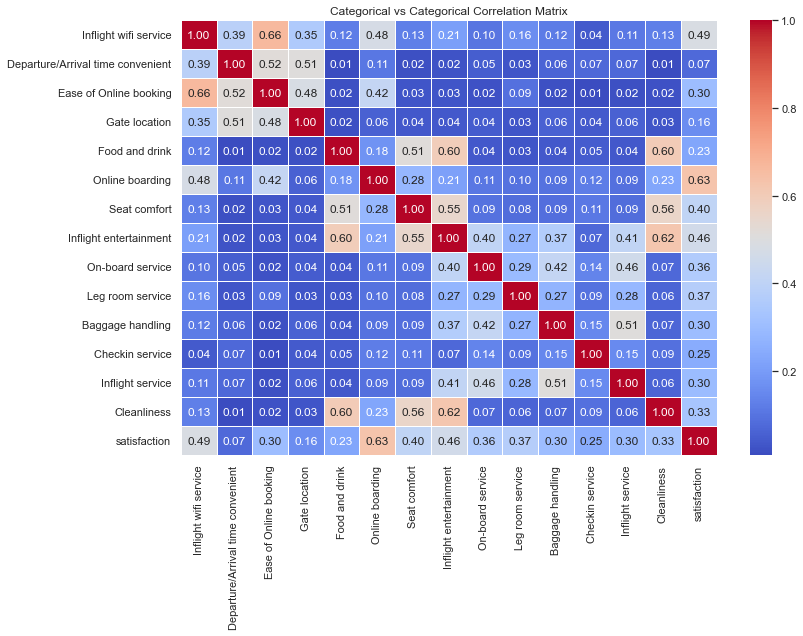

In [254]:
# Plot correlation matrix for categorical vs categorical variables
plt.figure(figsize=(12, 8))
sns.heatmap(cat_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Categorical vs Categorical Correlation Matrix')
plt.show()

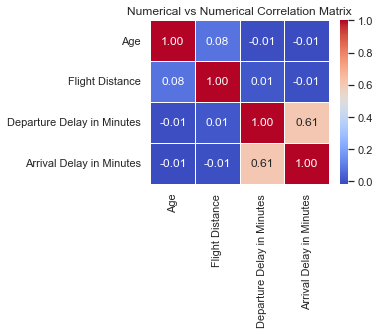

In [255]:
# Plot correlation matrix for numerical vs numerical variables
plt.figure(figsize=(4, 3))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Numerical vs Numerical Correlation Matrix')
plt.show()

In [256]:
#satisfaction based on other variables

In [257]:
len(categorical_columns)

19

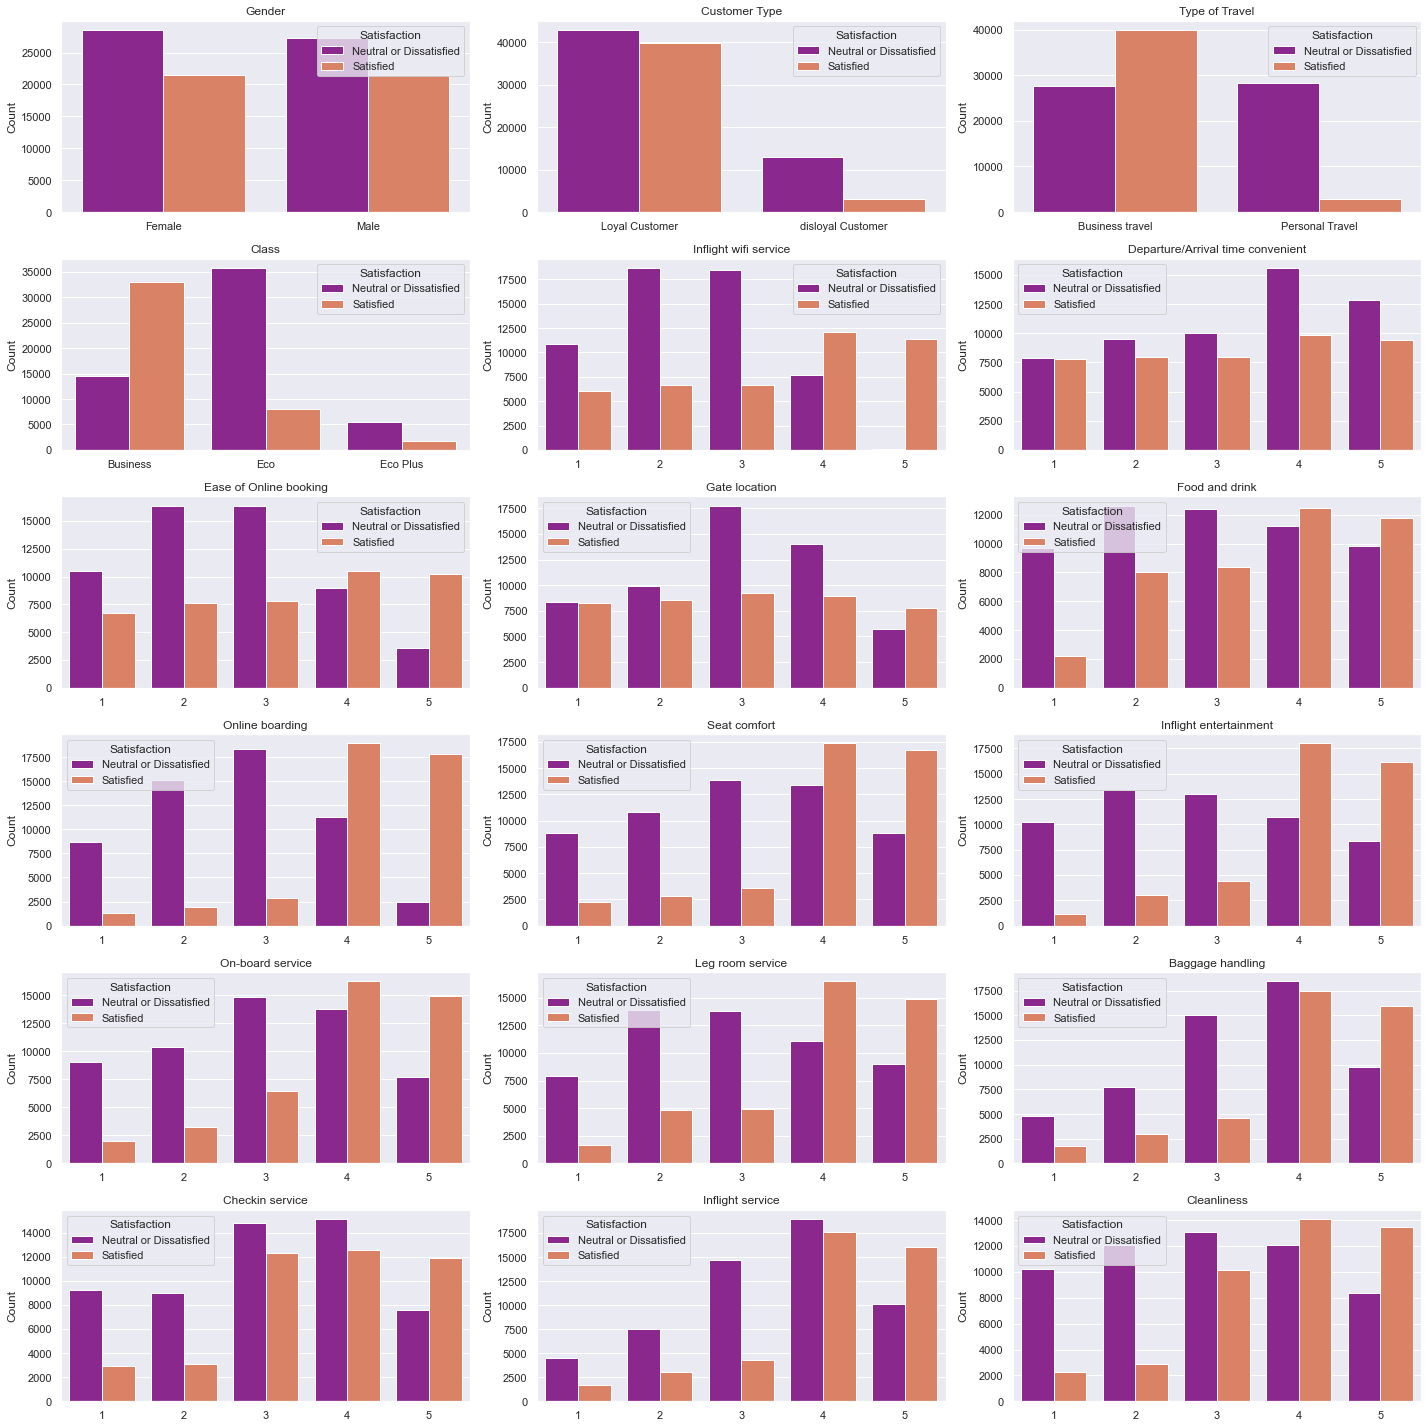

In [258]:
fig, ax = plt.subplots(6, 3, figsize=(20, 20))
ax = ax.flatten()
palette = sns.color_palette("plasma", n_colors=2)
for i in range(len(categorical_columns) - 1):
    sns.countplot(x=dfclassification[categorical_columns[i]], hue=dfclassification['satisfaction'], ax=ax[i], palette=palette, hue_order=[0, 1])
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Count')
    ax[i].set_title(categorical_columns[i])
    ax[i].legend(title='Satisfaction', labels=['Neutral or Dissatisfied', 'Satisfied'])
for i in range(len(categorical_columns) - 1, len(ax)):
    fig.delaxes(ax[i])
plt.tight_layout()
plt.show()

In [259]:
#everyone that voted rating 5 for inflight wifi service are also the people who were satisfied.

### Multivariate Analysis

In [260]:
# satisfaction based on flight distance and class

In [261]:
# Define bin labels for every 500 interval
distance_group_labels = ['0-499', '500-999', '1000-1499', '1500-1999', '2000-2499', '2500-2999', '3000-3499', '3500-3999']

# Cut the 'Flight Distance' into bins and assign the corresponding labels
dfclassification['Distance Group'] = pd.cut(dfclassification['Flight Distance'],
                                            bins=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000],
                                            labels=distance_group_labels
                                           )


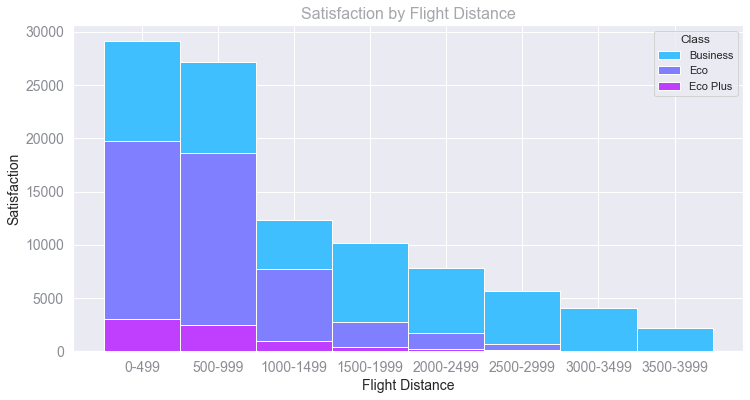

In [262]:
plt.figure(figsize=(12, 6))
sns.histplot(data=dfclassification, x='Distance Group', hue='Class', zorder=5, alpha=1, palette='cool', multiple='stack')
plt.title('Satisfaction by Flight Distance', fontsize=16, color='#a5a7ab')
plt.xlabel('Flight Distance', fontsize=14)
plt.ylabel('Satisfaction', fontsize=14)
plt.xticks(fontsize=14, color='#8a8d93')
plt.yticks(fontsize=14, color='#8a8d93')
plt.show()


In [263]:
#Travelers on long-distance flights, particularly those in business class, tend to have higher satisfaction rates.

In [264]:
#Satisfaction by Age and Class

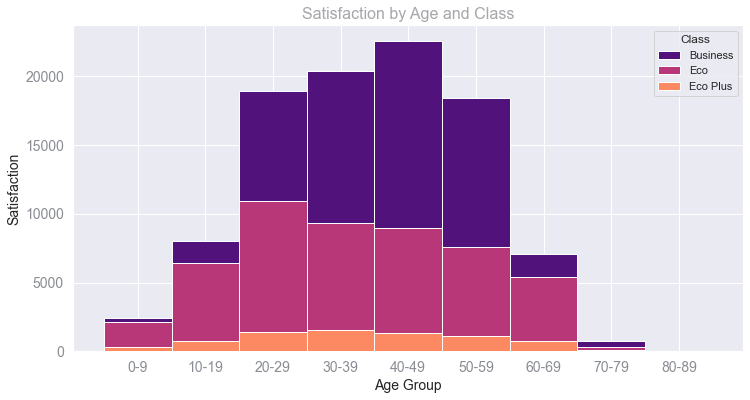

In [265]:
# Define the labels for age groups
age_group_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Create the 'Age Group' column with bins of 10-year intervals
dfclassification['Age Group'] = pd.cut(dfclassification['Age'],
                                       bins=range(0, 101, 10),
                                       labels=age_group_labels)

# Plot the histogram
plt.figure(figsize=(12, 6))

sns.histplot(data=dfclassification, x='Age Group', hue='Class', zorder=5, alpha=1, palette='magma', multiple='stack')
plt.title('Satisfaction by Age and Class', fontsize=16, color='#a5a7ab')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Satisfaction', fontsize=14)
plt.xticks(fontsize=14, color='#8a8d93')
plt.yticks(fontsize=14, color='#8a8d93')
plt.show()

In [266]:
#checking if satisfaction is balanced

In [267]:
dfclassification['satisfaction'].value_counts()

0    55780
1    42834
Name: satisfaction, dtype: int64

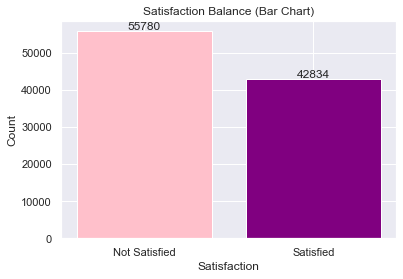

In [268]:
import matplotlib.pyplot as plt

# Calculate the counts of each class in the 'satisfaction' column
satisfaction_counts = dfclassification['satisfaction'].value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(satisfaction_counts.index, satisfaction_counts.values, color=['pink', 'purple'])

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height, ha='center', va='bottom')

plt.title('Satisfaction Balance (Bar Chart)')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Satisfied', 'Satisfied'])
plt.show()


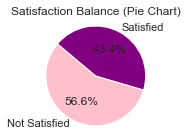

In [269]:
import matplotlib.pyplot as plt

# Calculate the counts of each class in the 'satisfaction' column
satisfaction_counts = dfclassification['satisfaction'].value_counts()

# Define labels for the pie chart
labels = ['Not Satisfied', 'Satisfied']

# Plot the counts using a pie chart
plt.figure(figsize=(2, 2))
plt.pie(satisfaction_counts.values, labels=labels, colors=['pink', 'purple'], autopct='%1.1f%%', startangle=140)
plt.title('Satisfaction Balance (Pie Chart)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [270]:
55775/98597

0.5656865827560676

In [271]:
42822/98597

0.43431341724393235

In [272]:
#gives a 57% and 43% respectively showing its approximately balanced

In [273]:
#standardising the variables except for categorical data 

In [274]:
#it was done already during EDA
dfclassificationnum.head()

Arrival Delay in Minutes  Departure Delay in Minutes  Flight Distance  \
1                  0.149122                    0.143487         0.536730   
4                  0.149157                    0.143487         0.513906   
5                  0.149122                    0.143487         0.485509   
8                  0.149122                    0.143493         0.495746   
9                  0.149156                    0.143511         0.524311   

        Age satisfaction  
1  2.685194            1  
4  3.515197            1  
5  1.397525            1  
8  3.387799            1  
9  3.324062            1

In [275]:
# Using indicator function for categorical variables and encode using OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Gender', 'Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
dfcategoricalclassif = dfclassification[cat_cols]
dfcategoricalclassif = pd.DataFrame(encoder.fit_transform(dfcategoricalclassif), columns=encoder.get_feature_names(cat_cols), index=dfclassificationnum.index)
dfcategoricalclassif.head()

Gender_Female  Gender_Male  Customer Type_Loyal Customer  \
1            1.0          0.0                           1.0   
4            1.0          0.0                           1.0   
5            0.0          1.0                           1.0   
8            0.0          1.0                           1.0   
9            1.0          0.0                           1.0   

   Customer Type_disloyal Customer  Type of Travel_Business travel  \
1                              0.0                             1.0   
4                              0.0                             1.0   
5                              0.0                             1.0   
8                              0.0                             1.0   
9                              0.0                             1.0   

   Type of Travel_Personal Travel  Class_Business  Class_Eco  Class_Eco Plus  \
1                             0.0             1.0        0.0             0.0   
4                             0.0             0.0        1.0             0.0   
5                             0.0             0.0        1.0             0.0   
8                             0.0             0.0        1.0             0.0   
9                             0.0             1.0        0.0             0.0   

   Inflight wifi service_1  ...  Inflight service_1  Inflight service_2  \
1                      1.0  ...                 0.0                 0.0   
4                      0.0  ...                 0.0                 1.0   
5                      0.0  ...                 0.0                 1.0   
8                      0.0  ...                 0.0                 0.0   
9                      0.0  ...                 0.0                 0.0   

   Inflight service_3  Inflight service_4  Inflight service_5  Cleanliness_1  \
1                 0.0                 1.0                 0.0            0.0   
4                 0.0                 0.0                 0.0            0.0   
5                 0.0                 0.0                 0.0            0.0   
8                 1.0                 0.0                 0.0            0.0   
9                 0.0                 1.0                 0.0            0.0   

   Cleanliness_2  Cleanliness_3  Cleanliness_4  Cleanliness_5  
1            0.0            0.0            0.0            1.0  
4            0.0            0.0            1.0            0.0  
5            0.0            0.0            0.0            1.0  
8            0.0            0.0            0.0            1.0  
9            0.0            0.0            1.0            0.0  

[5 rows x 79 columns]

In [276]:
dfclassif_new = pd.merge(dfclassificationnum, dfcategoricalclassif, left_index=True, right_index=True, how='left')
print('Shape of dataframe:',dfclassif_new.shape)
dfclassif_new.head()

Shape of dataframe: (98614, 84)


Arrival Delay in Minutes  Departure Delay in Minutes  Flight Distance  \
1                  0.149122                    0.143487         0.536730   
4                  0.149157                    0.143487         0.513906   
5                  0.149122                    0.143487         0.485509   
8                  0.149122                    0.143493         0.495746   
9                  0.149156                    0.143511         0.524311   

        Age satisfaction  Gender_Female  Gender_Male  \
1  2.685194            1            1.0          0.0   
4  3.515197            1            1.0          0.0   
5  1.397525            1            0.0          1.0   
8  3.387799            1            0.0          1.0   
9  3.324062            1            1.0          0.0   

   Customer Type_Loyal Customer  Customer Type_disloyal Customer  \
1                           1.0                              0.0   
4                           1.0                              0.0   
5                           1.0                              0.0   
8                           1.0                              0.0   
9                           1.0                              0.0   

   Type of Travel_Business travel  ...  Inflight service_1  \
1                             1.0  ...                 0.0   
4                             1.0  ...                 0.0   
5                             1.0  ...                 0.0   
8                             1.0  ...                 0.0   
9                             1.0  ...                 0.0   

   Inflight service_2  Inflight service_3  Inflight service_4  \
1                 0.0                 0.0                 1.0   
4                 1.0                 0.0                 0.0   
5                 1.0                 0.0                 0.0   
8                 0.0                 1.0                 0.0   
9                 0.0                 0.0                 1.0   

   Inflight service_5  Cleanliness_1  Cleanliness_2  Cleanliness_3  \
1                 0.0            0.0            0.0            0.0   
4                 0.0            0.0            0.0            0.0   
5                 0.0            0.0            0.0            0.0   
8                 0.0            0.0            0.0            0.0   
9                 0.0            0.0            0.0            0.0   

   Cleanliness_4  Cleanliness_5  
1            0.0            1.0  
4            1.0            0.0  
5            0.0            1.0  
8            0.0            1.0  
9            1.0            0.0  

[5 rows x 84 columns]

In [277]:
dfclassif_new.shape

(98614, 84)

#### Feature Selection will be done based in the correlations calculated

In [278]:
#satisfaction column is dropped in order to predict it

In [279]:
dfclassiftest= dfclassif_new.drop(columns=["satisfaction"])
dfclassiftest.shape

(98614, 83)

In [280]:
#predicting 

In [281]:
y=np.array(dfclassif_new['satisfaction'])

In [282]:
#data preperation Train,Test,Split

In [283]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfclassiftest, y, test_size=0.2, random_state=0)

## Decision Tree Classifier

In [284]:
from sklearn.tree import DecisionTreeClassifier
decisiontreemodel= DecisionTreeClassifier(criterion='entropy', random_state=0)  
decisiontreemodel.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [285]:
#predicting
y_preddt= decisiontreemodel.predict(X_test) 

In [286]:
#test accuracy

In [287]:
from sklearn.metrics import confusion_matrix
cmdt= confusion_matrix(y_test, y_preddt)
cmdt

array([[10630,   534],
       [  499,  8060]], dtype=int64)

In [288]:
# Calculate accuracy
accuracydt= (cmdt[0,0] + cmdt[1,1]) / sum(sum(cmdt))
# Convert to percentage
accuracy_percentdt = accuracydt * 100
print("Accuracy: {:.2f}%".format(accuracy_percentdt))
from sklearn.metrics import classification_report
# Print classification report
print(classification_report(y_test, y_preddt))

Accuracy: 94.76%
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     11164
           1       0.94      0.94      0.94      8559

    accuracy                           0.95     19723
   macro avg       0.95      0.95      0.95     19723
weighted avg       0.95      0.95      0.95     19723



In [289]:
# ROC Curve
from sklearn.metrics import roc_curve, plot_roc_curve,auc
fpr, tpr, thresholds = roc_curve(y_test, decisiontreemodel.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

<Figure size 360x288 with 0 Axes>

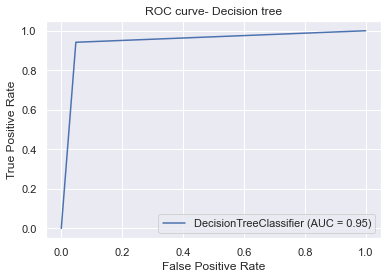

In [290]:
plt.figure(figsize=(5, 4))
plot_roc_curve(decisiontreemodel, X_test, y_test)
plt.title('ROC curve- Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

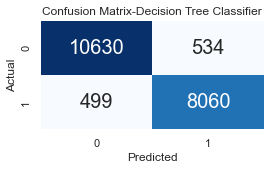

In [291]:
# Visualize Confusion Matrix
plt.figure(figsize=(4, 2))  
sns.heatmap(cmdt, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-Decision Tree Classifier", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()


## Logistic Regression

In [292]:
from sklearn.linear_model import LogisticRegression
logisticregressionmodel = LogisticRegression(random_state=16)
logisticregressionmodel.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [293]:
#predicting
y_predlr = logisticregressionmodel.predict(X_test)

In [294]:
#test accuracy

In [295]:
#create the confusion matrix
from sklearn import metrics
cmlr = metrics.confusion_matrix(y_test, y_predlr)
cmlr

array([[10551,   613],
       [  736,  7823]], dtype=int64)

In [296]:
# Calculate accuracy
accuracylr= (cmlr[0,0] + cmlr[1,1]) / sum(sum(cmlr))

# Convert to percentage
accuracy_percentlr = accuracylr * 100

print("Accuracy: {:.2f}%".format(accuracy_percentlr))
# Print classification report
print(classification_report(y_test, y_predlr))

Accuracy: 93.16%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11164
           1       0.93      0.91      0.92      8559

    accuracy                           0.93     19723
   macro avg       0.93      0.93      0.93     19723
weighted avg       0.93      0.93      0.93     19723



<Figure size 576x432 with 0 Axes>

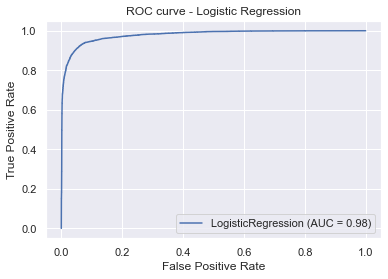

In [297]:
# Get predicted probabilities for positive class
y_proba_lr = logisticregressionmodel.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(logisticregressionmodel, X_test, y_test)
plt.title('ROC curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

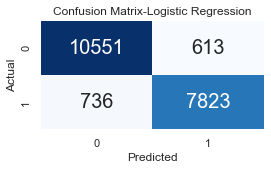

In [298]:
# Visualize Confusion Matrix
plt.figure(figsize=(4, 2))  
sns.heatmap(cmlr, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-Logistic Regression", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()

## Random Forest Classifier

In [299]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [300]:
#predicting
y_predrf = randomforestmodel.predict(X_test)

In [301]:
#test accuracy

In [302]:
# Create the confusion matrix
cmrf = confusion_matrix(y_test, y_predrf)
cmrf

array([[10936,   228],
       [  545,  8014]], dtype=int64)

In [303]:
# Calculate accuracy
accuracyrf= (cmrf[0,0] + cmrf[1,1]) / sum(sum(cmrf))

# Convert to percentage
accuracy_percentrf = accuracyrf * 100

print("Accuracy: {:.2f}%".format(accuracy_percentrf))
# Print classification report
print(classification_report(y_test, y_predrf))

Accuracy: 96.08%
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11164
           1       0.97      0.94      0.95      8559

    accuracy                           0.96     19723
   macro avg       0.96      0.96      0.96     19723
weighted avg       0.96      0.96      0.96     19723



In [304]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_predrf)

<Figure size 576x432 with 0 Axes>

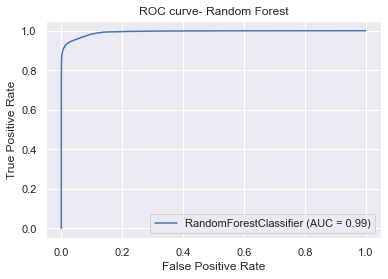

In [305]:
# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plot_roc_curve(randomforestmodel, X_test, y_test)
plt.title('ROC curve- Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

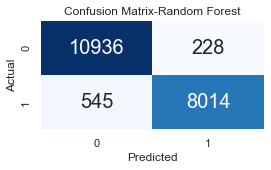

In [306]:
# Visualize Confusion Matrix
plt.figure(figsize=(4, 2))  
sns.heatmap(cmrf, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-Random Forest", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()

## Naive Bayes classifier

In [307]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [308]:
#prediciting
y_predmnb = mnb.predict(X_test)

In [309]:
from sklearn.metrics import accuracy_score
# Evaluate the performance of the classifier
accuracymnb = accuracy_score(y_test, y_predmnb)
# Convert to percentage
accuracy_percentmnb = accuracymnb * 100
print("Accuracy: {:.2f}%".format(accuracy_percentmnb))
# Print classification report
print(classification_report(y_test, y_predmnb))

Accuracy: 88.61%
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     11164
           1       0.87      0.86      0.87      8559

    accuracy                           0.89     19723
   macro avg       0.88      0.88      0.88     19723
weighted avg       0.89      0.89      0.89     19723



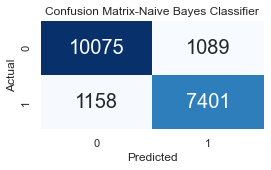

In [310]:
# Visualize Confusion Matrix
cmnb = confusion_matrix(y_test, y_predmnb)
plt.figure(figsize=(4, 2))  
sns.heatmap(cmnb, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-Naive Bayes Classifier", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()

<Figure size 576x432 with 0 Axes>

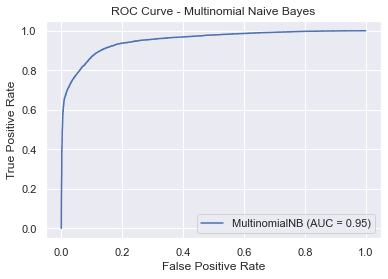

In [311]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(mnb, X_test, y_test)
plt.title('ROC Curve - Multinomial Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## SVM

In [312]:
from sklearn.svm import SVC
# Create a non-linear kernel SVM classifier
svm = SVC(kernel='poly',degree=5, random_state=42)
svm.fit(X_train, y_train)

SVC(degree=5, kernel='poly', random_state=42)

In [313]:
#predicting
y_pred_svm = svm.predict(X_test)

In [314]:
# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
# Convert to percentage
accuracy_percentsvm = accuracy_svm * 100
print("Accuracy: {:.2f}%".format(accuracy_percentsvm))
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Accuracy: 95.93%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     11164
           1       0.97      0.94      0.95      8559

    accuracy                           0.96     19723
   macro avg       0.96      0.96      0.96     19723
weighted avg       0.96      0.96      0.96     19723



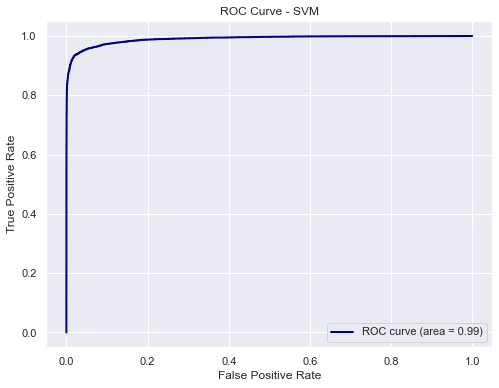

In [315]:
# Plot ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()

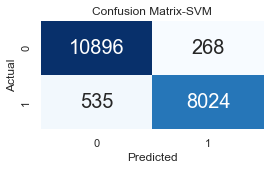

In [316]:
# Visualize Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(4, 2))  
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-SVM", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()

## XG Boost

In [317]:
import xgboost
model = xgboost.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [318]:
#predicting
y_pred_xgb = model.predict(X_test)

In [319]:
# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# Convert to percentage
accuracy_percentxgb = accuracy_xgb * 100
print("Accuracy: {:.2f}%".format(accuracy_percentxgb))

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

Accuracy: 96.16%
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11164
           1       0.97      0.94      0.96      8559

    accuracy                           0.96     19723
   macro avg       0.96      0.96      0.96     19723
weighted avg       0.96      0.96      0.96     19723



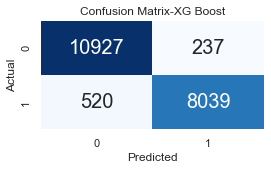

In [320]:
# Visualize Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 2))  
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 20})  
plt.title("Confusion Matrix-XG Boost", fontsize=12)  
plt.xlabel("Predicted", fontsize=12) 
plt.ylabel("Actual", fontsize=12) 
plt.show()

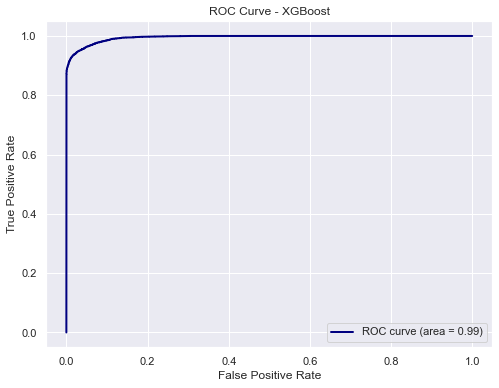

In [321]:
# ROC Curve
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='navy', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

### Plotting the ROC Curves for all the models for comparison purposes

In [322]:
# Calculate ROC curve and AUC for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, decisiontreemodel.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_lr, tpr_lr, _ = roc_curve(y_test, logisticregressionmodel.predict_proba(X_test)[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, randomforestmodel.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb.predict_proba(X_test)[:,1])
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

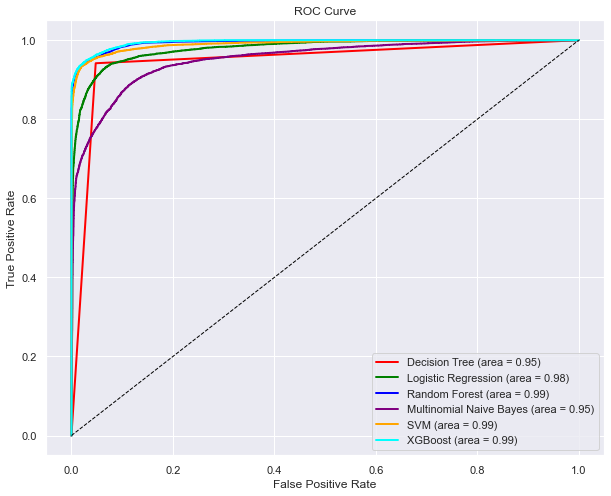

In [323]:
# Plotting all ROC curves on the same graph
plt.figure(figsize=(10, 8))

plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='green', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_mnb, tpr_mnb, color='purple', lw=2, label='Multinomial Naive Bayes (area = %0.2f)' % roc_auc_mnb)
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='SVM (area = %0.2f)' % roc_auc_svm)
plt.plot(fpr_xgb, tpr_xgb, color='cyan', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)

plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


### Plotting the precision recall curve for model comparison purposes

In [324]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate Precision-Recall curve and average precision for each model
precision_dt, recall_dt, _ = precision_recall_curve(y_test, decisiontreemodel.predict_proba(X_test)[:,1])
avg_precision_dt = average_precision_score(y_test, decisiontreemodel.predict_proba(X_test)[:,1])

precision_lr, recall_lr, _ = precision_recall_curve(y_test, logisticregressionmodel.predict_proba(X_test)[:,1])
avg_precision_lr = average_precision_score(y_test, logisticregressionmodel.predict_proba(X_test)[:,1])

precision_rf, recall_rf, _ = precision_recall_curve(y_test, randomforestmodel.predict_proba(X_test)[:,1])
avg_precision_rf = average_precision_score(y_test, randomforestmodel.predict_proba(X_test)[:,1])

precision_mnb, recall_mnb, _ = precision_recall_curve(y_test, mnb.predict_proba(X_test)[:,1])
avg_precision_mnb = average_precision_score(y_test, mnb.predict_proba(X_test)[:,1])

precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm.decision_function(X_test))
avg_precision_svm = average_precision_score(y_test, svm.decision_function(X_test))

precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
avg_precision_xgb = average_precision_score(y_test, model.predict_proba(X_test)[:,1])

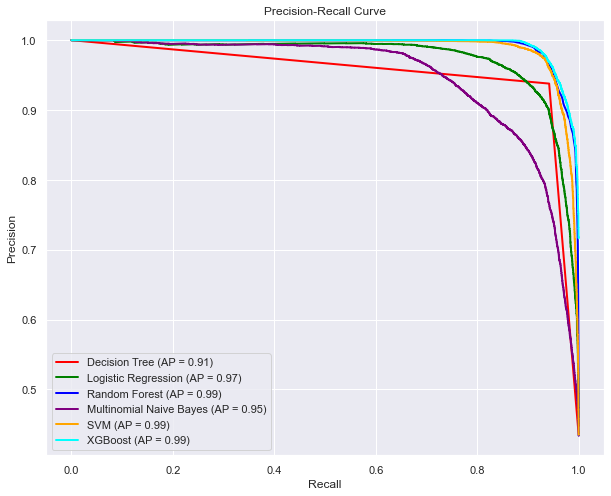

In [325]:
# Plotting all Precision-Recall curves on the same graph
plt.figure(figsize=(10, 8))

plt.plot(recall_dt, precision_dt, color='red', lw=2, label='Decision Tree (AP = %0.2f)' % avg_precision_dt)
plt.plot(recall_lr, precision_lr, color='green', lw=2, label='Logistic Regression (AP = %0.2f)' % avg_precision_lr)
plt.plot(recall_rf, precision_rf, color='blue', lw=2, label='Random Forest (AP = %0.2f)' % avg_precision_rf)
plt.plot(recall_mnb, precision_mnb, color='purple', lw=2, label='Multinomial Naive Bayes (AP = %0.2f)' % avg_precision_mnb)
plt.plot(recall_svm, precision_svm, color='orange', lw=2, label='SVM (AP = %0.2f)' % avg_precision_svm)
plt.plot(recall_xgb, precision_xgb, color='cyan', lw=2, label='XGBoost (AP = %0.2f)' % avg_precision_xgb)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()
